## DOMAIN: 
Automobile
### CONTEXT: 
The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes <br />
### DATA DESCRIPTION: 
The data concerns city-cycle fuel consumption in miles per gallon <br />
###  Attribute Information:
1. mpg: continuous
2. cylinders(cyl): multi-valued discrete
3. displacement(disp): continuous
4. horsepower(hp): continuous
5. weight(wt): continuous
6. acceleration(acc): continuous
7. model year(yr): multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance) <br/>

### PROJECT OBJECTIVE: 
Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

In [3117]:
#Loading the required packages
import numpy as np   
from sklearn.linear_model import LinearRegression
from scipy import stats 
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# PART A - AUTOMOBILE

## 1. Import and warehouse data:

### Import all the given datasets. Explore shape and size.

In [3118]:
auto = open('Part1 - Car-Attributes.json',)

In [3119]:
auto_dic = json.load(auto)

In [3120]:
df_auto=pd.DataFrame(auto_dic)

In [3121]:
df_auto

mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
..    ...  ...    ...  ...   ...   ...  ..     ...
393  27.0    4  140.0   86  2790  15.6  82       1
394  44.0    4   97.0   52  2130  24.6  82       2
395  32.0    4  135.0   84  2295  11.6  82       1
396  28.0    4  120.0   79  2625  18.6  82       1
397  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]

In [3122]:
df_car_name = pd.read_csv('Part1 - Car name.csv')

In [3123]:
df_auto.shape

(398, 8)

In [3124]:
df_auto.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

In [3125]:
df_car_name.shape

(398, 1)

In [3126]:
df_car_name.head()

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

### Merge all datasets onto one and explore final shape and size.

In [3127]:
df = pd.concat([df_auto, df_car_name], axis = 1)
df

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0    18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1    15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2    18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3    16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4    17.0    8  302.0  140  3449  10.5  70       1                ford torino
..    ...  ...    ...  ...   ...   ...  ..     ...                        ...
393  27.0    4  140.0   86  2790  15.6  82       1            ford mustang gl
394  44.0    4   97.0   52  2130  24.6  82       2                  vw pickup
395  32.0    4  135.0   84  2295  11.6  82       1              dodge rampage
396  28.0    4  120.0   79  2625  18.6  82       1                ford ranger
397  31.0    4  119.0   82  2720  19.4  82       1                 chevy s-10

[398 rows x 9 columns]

In [3128]:
row, column = df.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 398 rows and 9 columns


### Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

In [3129]:
df.to_csv('Automobile_Merged.csv',index=False)

In [3130]:
df.to_excel('Automobile_Merged.xlsx',index=False)

In [3131]:
df.to_json('Automobile_Merged.json', orient = 'records', compression = 'infer', index = 'true')

### Saving Merged Dataset for Automating later.

## 2. Data Cleansing:

### Missing/incorrect value treatment

In [3132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3133]:
df.describe().T

count         mean         std     min       25%     50%       75%     max
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000    46.6
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000     8.0
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   455.0
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000  5140.0
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175    24.8
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000    82.0
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000     3.0

In [3134]:
df.isnull().sum() #to check if any column is having null values

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [3135]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(df.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
df[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false

mpg  cyl   disp hp    wt   acc  yr  origin              car_name
32   25.0    4   98.0  ?  2046  19.0  71       1            ford pinto
126  21.0    6  200.0  ?  2875  17.0  74       1         ford maverick
330  40.9    4   85.0  ?  1835  17.3  80       2  renault lecar deluxe
336  23.6    4  140.0  ?  2905  14.3  80       1    ford mustang cobra
354  34.5    4  100.0  ?  2320  15.8  81       2           renault 18i
374  23.0    4  151.0  ?  3035  20.5  82       1        amc concord dl

In [3136]:
df = df.replace('?', np.nan)
df[hpIsDigit['hp'] == False] 

mpg  cyl   disp  hp    wt   acc  yr  origin              car_name
32   25.0    4   98.0 NaN  2046  19.0  71       1            ford pinto
126  21.0    6  200.0 NaN  2875  17.0  74       1         ford maverick
330  40.9    4   85.0 NaN  1835  17.3  80       2  renault lecar deluxe
336  23.6    4  140.0 NaN  2905  14.3  80       1    ford mustang cobra
354  34.5    4  100.0 NaN  2320  15.8  81       2           renault 18i
374  23.0    4  151.0 NaN  3035  20.5  82       1        amc concord dl

In [3137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [3138]:
#instead of dropping the rows, lets replace the missing values with median value. 
df.median()

mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

In [3139]:
df.isnull().sum() #to check if any column is having null values

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [3140]:
df=df.fillna(df.median())

In [3141]:
df.isnull().sum() #to check if any column is having null values

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [3142]:
df.loc[df.hp == df.hp.median(), 'hp']

32     93.5
126    93.5
330    93.5
336    93.5
354    93.5
374    93.5
Name: hp, dtype: float64

In [3143]:
print(df.cyl.value_counts())
print(df.origin.value_counts())

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64
1    249
3     79
2     70
Name: origin, dtype: int64


### Drop attribute/s if required using relevant functional knowledge

In [3144]:
#dropping/ignoring car_name  and origin
df = df.drop(['car_name'], axis=1)
df.head()

mpg  cyl   disp     hp    wt   acc  yr  origin
0  18.0    8  307.0  130.0  3504  12.0  70       1
1  15.0    8  350.0  165.0  3693  11.5  70       1
2  18.0    8  318.0  150.0  3436  11.0  70       1
3  16.0    8  304.0  150.0  3433  12.0  70       1
4  17.0    8  302.0  140.0  3449  10.5  70       1

### Perform another kind of corrections/treatment on the data.

In [3145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [3146]:
df.cyl.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [3147]:
df.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [3148]:
df.yr.value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: yr, dtype: int64

## 3. Data analysis & visualisation

### Perform detailed statistical analysis on the data.

In [3149]:
df.describe()

mpg         cyl        disp          hp           wt         acc          yr      origin
count  398.000000  398.000000  398.000000  398.000000   398.000000  398.000000  398.000000  398.000000
mean    23.514573    5.454774  193.425879  104.304020  2970.424623   15.568090   76.010050    1.572864
std      7.815984    1.701004  104.269838   38.222625   846.841774    2.757689    3.697627    0.802055
min      9.000000    3.000000   68.000000   46.000000  1613.000000    8.000000   70.000000    1.000000
25%     17.500000    4.000000  104.250000   76.000000  2223.750000   13.825000   73.000000    1.000000
50%     23.000000    4.000000  148.500000   93.500000  2803.500000   15.500000   76.000000    1.000000
75%     29.000000    8.000000  262.000000  125.000000  3608.000000   17.175000   79.000000    2.000000
max     46.600000    8.000000  455.000000  230.000000  5140.000000   24.800000   82.000000    3.000000

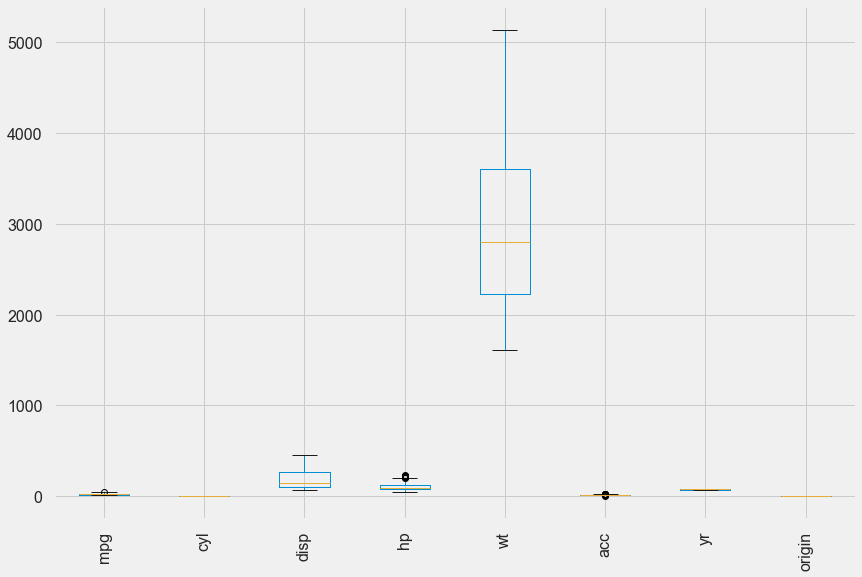

<Figure size 1080x720 with 0 Axes>

In [3150]:
style.use('seaborn-poster')
style.use('fivethirtyeight')
g = df.boxplot()
g.set_xticklabels(rotation=90,labels=df.columns)
figure=plt.figure(figsize=(15,10))
#plt.xticks(rotation =45,fontsize =20)

#### From the above box plots we have outliers for mpg(Miles Per gallon), hp(Horsepower) and acc(Acceleration) columns.

### Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [3151]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [3152]:
df.yr.value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: yr, dtype: int64

In [3153]:
i = 0
def model_yr(x):
    y='19'+str(x)
    return y
    

df['model_yr'] = df['yr'].apply(model_yr)
df.head()

mpg  cyl   disp     hp    wt   acc  yr  origin model_yr
0  18.0    8  307.0  130.0  3504  12.0  70       1     1970
1  15.0    8  350.0  165.0  3693  11.5  70       1     1970
2  18.0    8  318.0  150.0  3436  11.0  70       1     1970
3  16.0    8  304.0  150.0  3433  12.0  70       1     1970
4  17.0    8  302.0  140.0  3449  10.5  70       1     1970

In [3154]:
df['model_yr'] = df['model_yr'].astype(np.int64)

In [3155]:
#creating mpg_level attribute using the 25% and 75% of mpg values( <  17 as low, > 17 and <29 as medium, > 29 as high  )
df['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
df.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  model_yr mpg_level
0  18.0    8  307.0  130.0  3504  12.0  70       1      1970    medium
1  15.0    8  350.0  165.0  3693  11.5  70       1      1970       low
2  18.0    8  318.0  150.0  3436  11.0  70       1      1970    medium
3  16.0    8  304.0  150.0  3433  12.0  70       1      1970       low
4  17.0    8  302.0  140.0  3449  10.5  70       1      1970    medium

In [3156]:
import datetime
df['current_year'] = datetime.datetime.now().year
df.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  model_yr mpg_level  current_year
0  18.0    8  307.0  130.0  3504  12.0  70       1      1970    medium          2021
1  15.0    8  350.0  165.0  3693  11.5  70       1      1970       low          2021
2  18.0    8  318.0  150.0  3436  11.0  70       1      1970    medium          2021
3  16.0    8  304.0  150.0  3433  12.0  70       1      1970       low          2021
4  17.0    8  302.0  140.0  3449  10.5  70       1      1970    medium          2021

In [3157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cyl           398 non-null    int64  
 2   disp          398 non-null    float64
 3   hp            398 non-null    float64
 4   wt            398 non-null    int64  
 5   acc           398 non-null    float64
 6   yr            398 non-null    int64  
 7   origin        398 non-null    int64  
 8   model_yr      398 non-null    int64  
 9   mpg_level     398 non-null    object 
 10  current_year  398 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 34.3+ KB


In [3158]:
df['age'] = df['current_year'] - df['model_yr']
df.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  model_yr mpg_level  current_year  age
0  18.0    8  307.0  130.0  3504  12.0  70       1      1970    medium          2021   51
1  15.0    8  350.0  165.0  3693  11.5  70       1      1970       low          2021   51
2  18.0    8  318.0  150.0  3436  11.0  70       1      1970    medium          2021   51
3  16.0    8  304.0  150.0  3433  12.0  70       1      1970       low          2021   51
4  17.0    8  302.0  140.0  3449  10.5  70       1      1970    medium          2021   51

In [3159]:
df.tail()

mpg  cyl   disp    hp    wt   acc  yr  origin  model_yr mpg_level  current_year  age
393  27.0    4  140.0  86.0  2790  15.6  82       1      1982    medium          2021   39
394  44.0    4   97.0  52.0  2130  24.6  82       2      1982      high          2021   39
395  32.0    4  135.0  84.0  2295  11.6  82       1      1982      high          2021   39
396  28.0    4  120.0  79.0  2625  18.6  82       1      1982    medium          2021   39
397  31.0    4  119.0  82.0  2720  19.4  82       1      1982      high          2021   39

In [3160]:
df = df.drop(['current_year','yr'], axis=1)
df

mpg  cyl   disp     hp    wt   acc  origin  model_yr mpg_level  age
0    18.0    8  307.0  130.0  3504  12.0       1      1970    medium   51
1    15.0    8  350.0  165.0  3693  11.5       1      1970       low   51
2    18.0    8  318.0  150.0  3436  11.0       1      1970    medium   51
3    16.0    8  304.0  150.0  3433  12.0       1      1970       low   51
4    17.0    8  302.0  140.0  3449  10.5       1      1970    medium   51
..    ...  ...    ...    ...   ...   ...     ...       ...       ...  ...
393  27.0    4  140.0   86.0  2790  15.6       1      1982    medium   39
394  44.0    4   97.0   52.0  2130  24.6       2      1982      high   39
395  32.0    4  135.0   84.0  2295  11.6       1      1982      high   39
396  28.0    4  120.0   79.0  2625  18.6       1      1982    medium   39
397  31.0    4  119.0   82.0  2720  19.4       1      1982      high   39

[398 rows x 10 columns]

In [3161]:
# Also replacing the categorical var with actual values
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head()

mpg  cyl   disp     hp    wt   acc   origin  model_yr mpg_level  age
0  18.0    8  307.0  130.0  3504  12.0  america      1970    medium   51
1  15.0    8  350.0  165.0  3693  11.5  america      1970       low   51
2  18.0    8  318.0  150.0  3436  11.0  america      1970    medium   51
3  16.0    8  304.0  150.0  3433  12.0  america      1970       low   51
4  17.0    8  302.0  140.0  3449  10.5  america      1970    medium   51

In [3162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mpg        398 non-null    float64
 1   cyl        398 non-null    int64  
 2   disp       398 non-null    float64
 3   hp         398 non-null    float64
 4   wt         398 non-null    int64  
 5   acc        398 non-null    float64
 6   origin     398 non-null    object 
 7   model_yr   398 non-null    int64  
 8   mpg_level  398 non-null    object 
 9   age        398 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


### Distribution of the numerical cols

In [3163]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'origin', 'model_yr', 'mpg_level', 'age'], dtype='object')

In [3164]:
df_num = df[['mpg', 'disp', 'hp', 'wt', 'acc']]

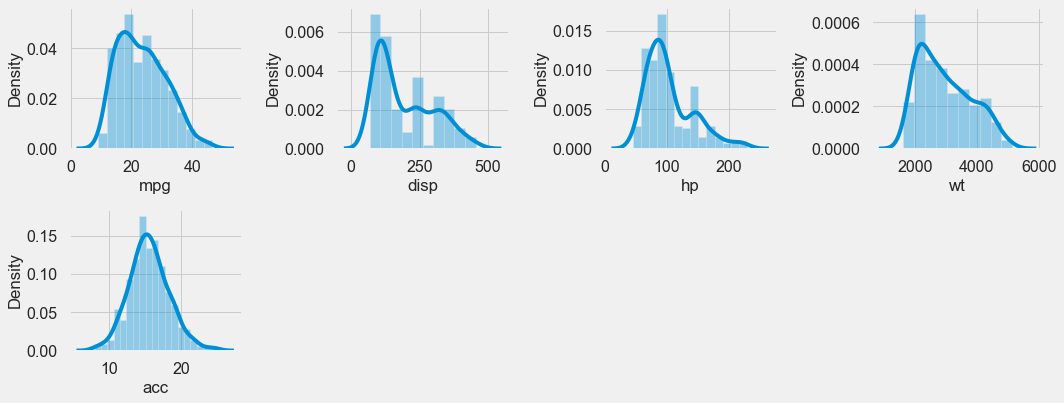

In [3165]:
fig = plt.figure(figsize = (15, 8))
for i in range(0, len(df_num.columns)):
    ax = fig.add_subplot(3, 4, i+1)
    sns.distplot(df_num[df_num.columns[i]])
    plt.tight_layout()

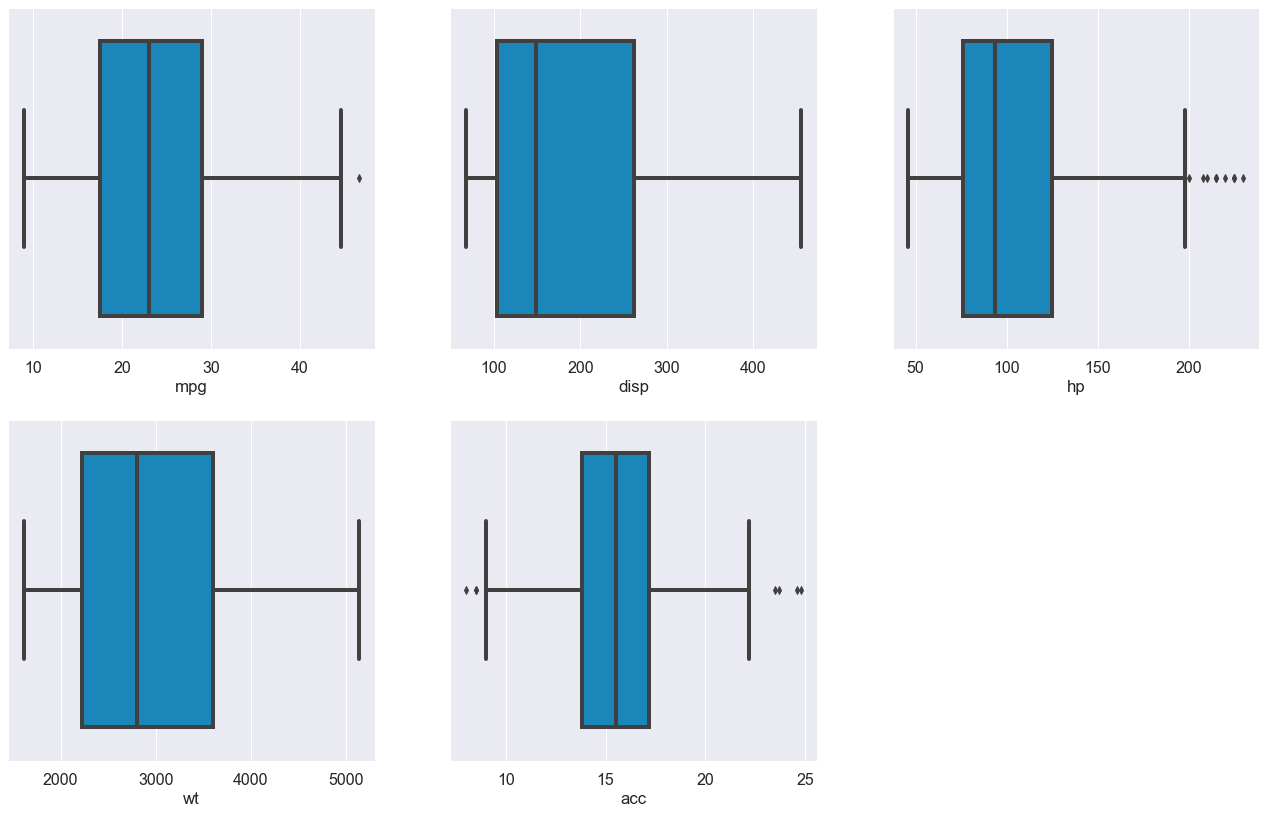

In [3166]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style= 'darkgrid')
plt.figure(figsize = (20,20))

j = 1
for i in df_num:
    plt.subplot(3,3,j)
    sns.boxplot(df_num[i])
    j += 1

#### From the above graph we see find outliers for mpg(Miles Per Gallon), hp(Horsepower), wt(Weight) and acc(Account) columns. disp(Displacement) and hp(Horsepower) are right skewed.

In [3167]:
#replacing outliers with IQR (Q1 and Q3 +-1.5*IQR)
IQR1 = stats.iqr(df_num['hp'], interpolation = 'midpoint')
IQR2 = stats.iqr(df_num['acc'], interpolation = 'midpoint')

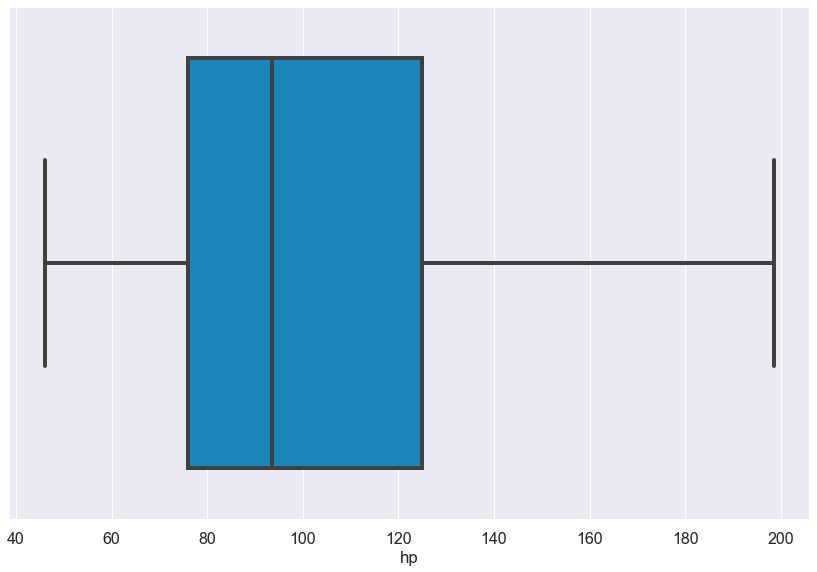

In [3168]:
#Horsepower after imputing outliers
Q3 = df_num['hp'].quantile(0.75)
df_num['hp'] = np.where(df_num["hp"] >(Q3+1.5*IQR1), 198.5,df_num['hp'])
sns.boxplot(df_num['hp']);

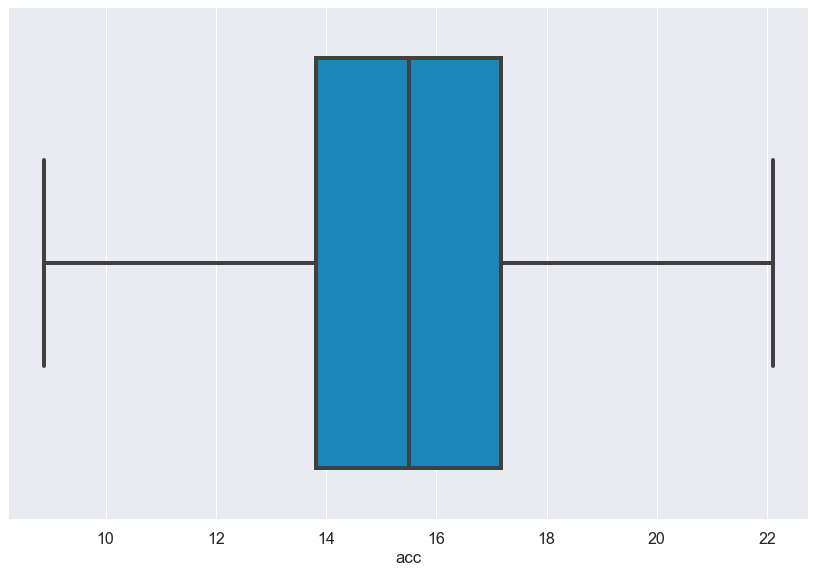

In [3169]:
#accelaration after imputing outliers
Q1 = df_num['acc'].quantile(0.25)
Q31=df_num['acc'].quantile(0.75)
df_num['acc'] = np.where(df_num["acc"] >(Q31+1.5*IQR2),22.10 ,df_num['acc'])
df_num['acc'] = np.where(df_num["acc"] <(Q1-1.5*IQR2),(Q1-1.5*IQR2),df_num['acc'])
sns.boxplot(df_num['acc']);

### Classification of Categorical columns

In [3170]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'origin', 'model_yr', 'mpg_level', 'age'], dtype='object')

In [3171]:
df_cat = df[['cyl', 'origin', 'model_yr', 'mpg_level', 'age']]

In [3172]:
df_cat.columns

Index(['cyl', 'origin', 'model_yr', 'mpg_level', 'age'], dtype='object')

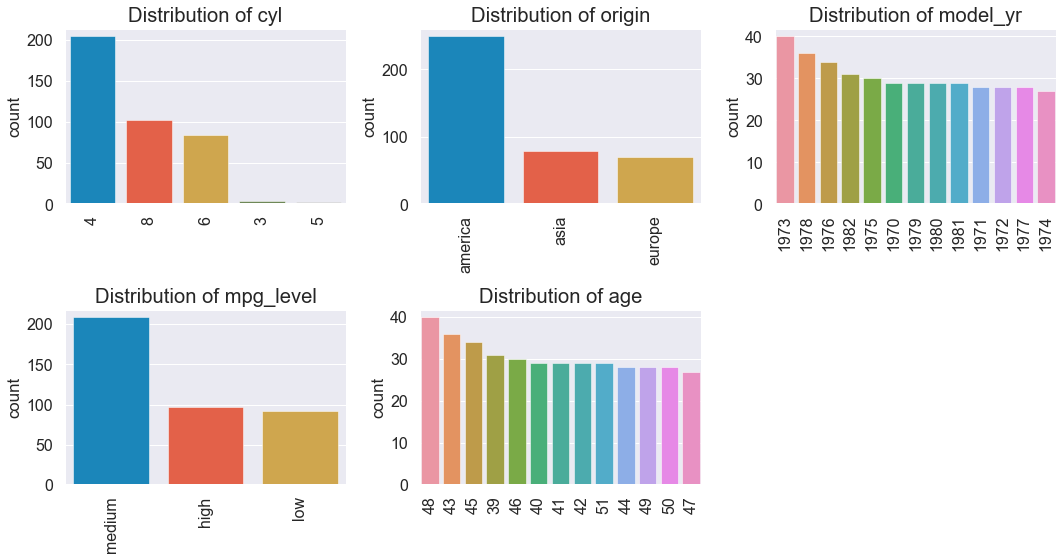

In [3173]:
#plotting categorical variables
fig = plt.figure(1, (15, 8))

for i,df in enumerate(df_cat.columns):
    ax = plt.subplot(2,3,i+1)
    sns.countplot(df_cat[df], order=df_cat[df].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {df}')
    plt.tight_layout()
    plt.xticks(rotation = 90)

plt.show()

#### American 4 cylinder cars produced in 1973 with medium mpg level seem to dominate the dateset

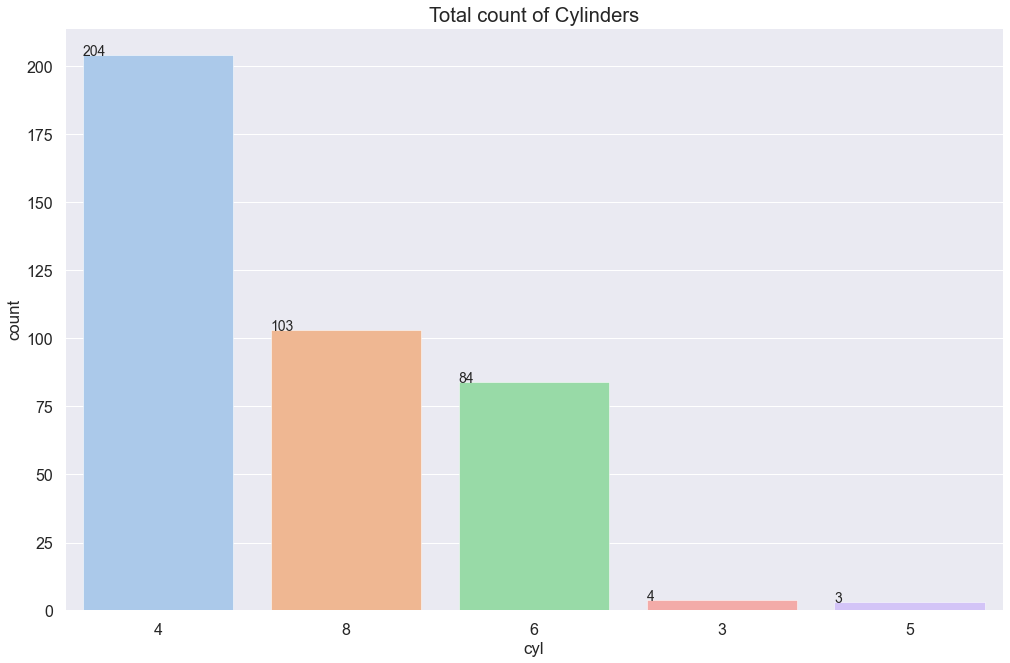

In [3174]:
##### Count of Cylinders.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="cyl", data=df_cat, 
                   order = df_cat['cyl'].value_counts().index)
plt.title('Total count of Cylinders')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that maximum number of cylinders used by cars is 4. 204 cars use 4 cylinders. 103 use 8 cylinders, 84 use 6 cylinders, only 4 use 3 cylinders and 3 use 5 cylinders.

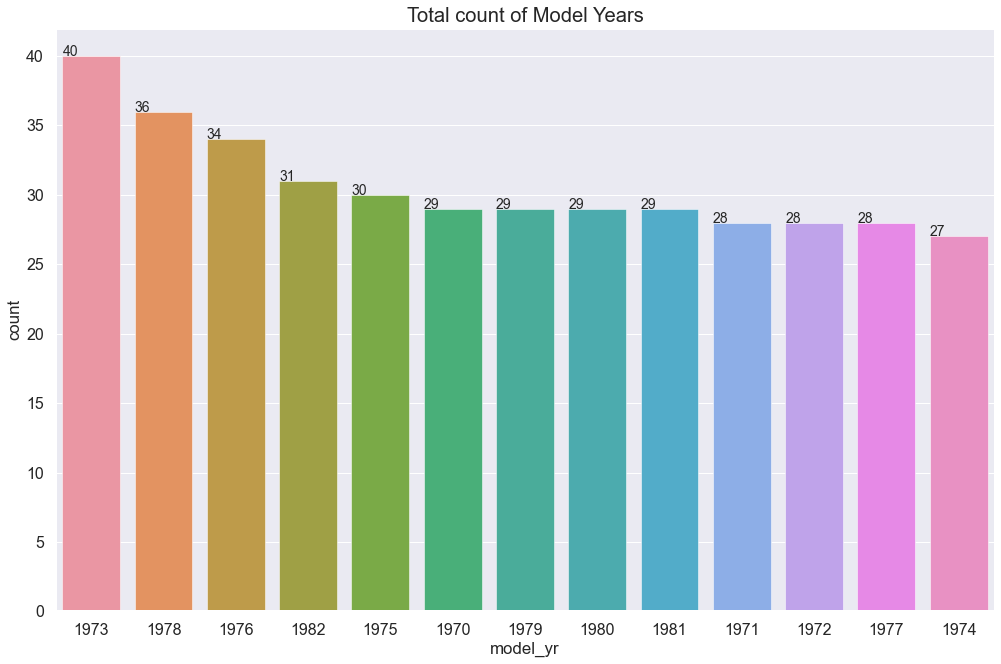

In [3175]:
# Count of Model Year.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="model_yr", data=df_cat, 
                   order = df_cat['model_yr'].value_counts().index)
plt.title('Total count of Model Years')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that maximum number of cars (40) were manufactured on 1973.

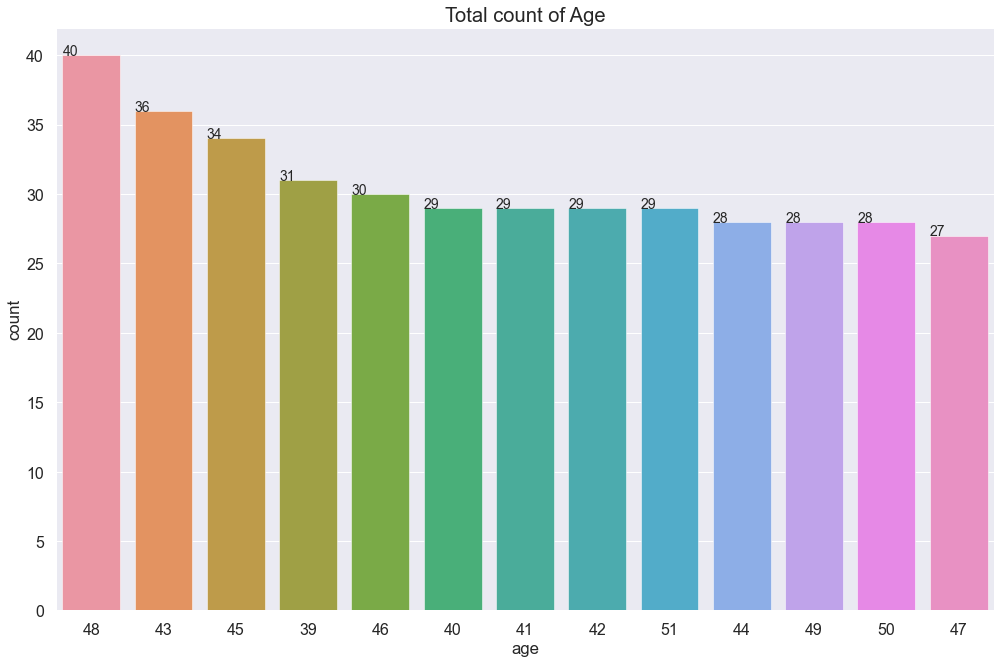

In [3176]:
# Count of Age.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="age", data=df_cat, 
                   order = df_cat['age'].value_counts().index)
plt.title('Total count of Age')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that maximum number of cars (40) are 48 years old. The oldest cars 51 years old and 50 years old are 29 and 28 in number.

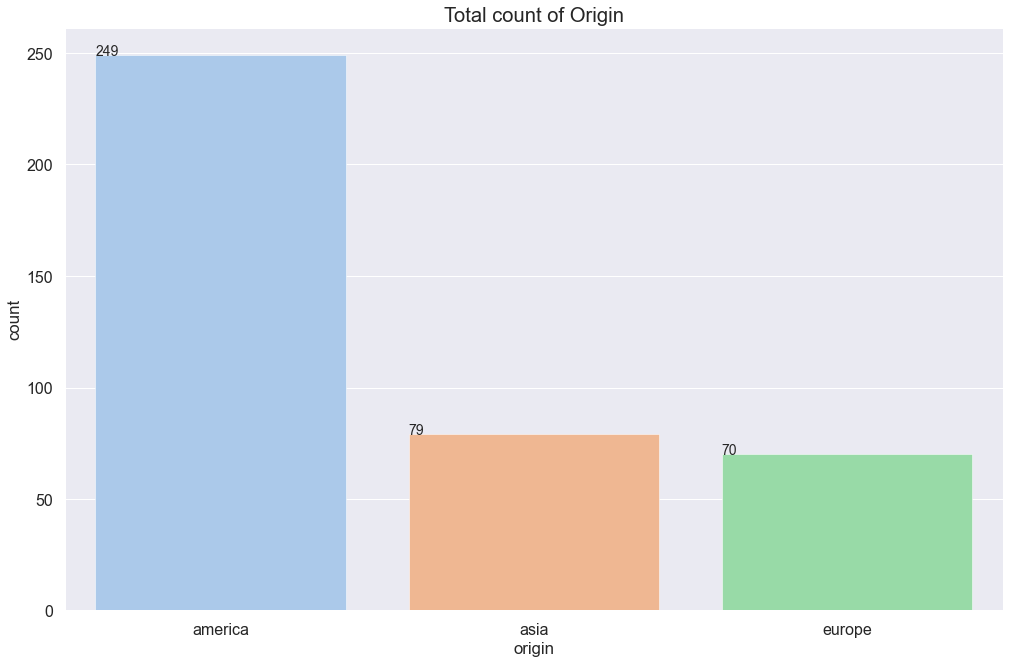

In [3177]:
# Count of Origin.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="origin", data=df_cat, 
                   order = df_cat['origin'].value_counts().index)
plt.title('Total count of Origin')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that there are maximum 249 cars in America.

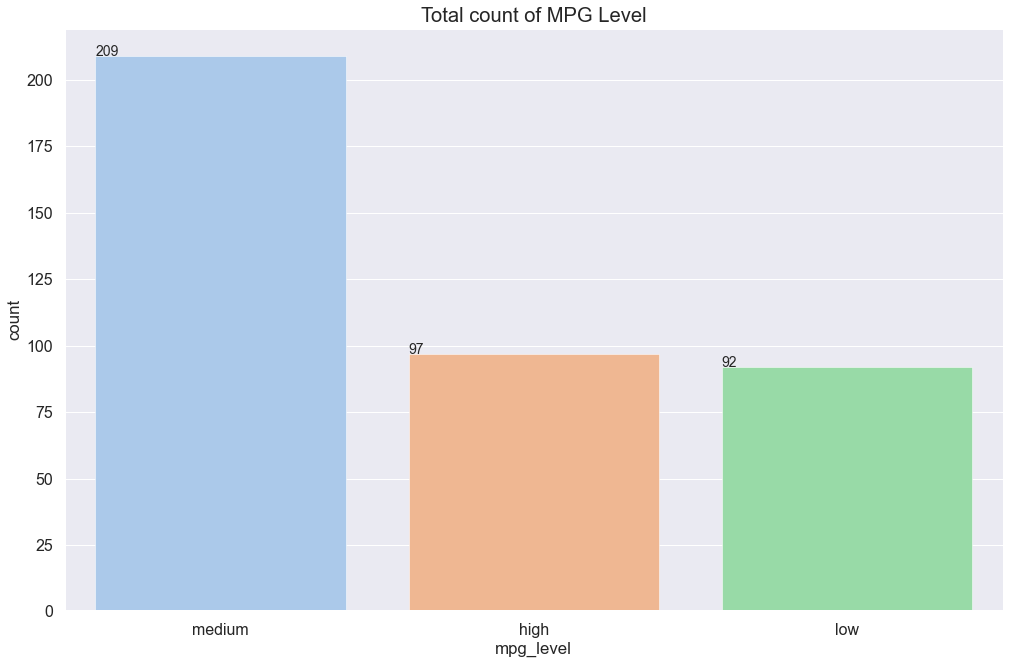

In [3178]:
# Count of MPG Level.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="mpg_level", data=df_cat, 
                   order = df_cat['mpg_level'].value_counts().index)
plt.title('Total count of MPG Level')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that there are maximum 209 cars have medium mpg.

In [3179]:
#joining the categorical and numerical variables
df=pd.concat([df_cat,df_num],axis=1)
df
df.drop('model_yr', axis= 1, inplace= True)  

In [3180]:
#checking for attribute type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cyl        398 non-null    int64  
 1   origin     398 non-null    object 
 2   mpg_level  398 non-null    object 
 3   age        398 non-null    int64  
 4   mpg        398 non-null    float64
 5   disp       398 non-null    float64
 6   hp         398 non-null    float64
 7   wt         398 non-null    int64  
 8   acc        398 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3181]:
df_num['origin']=df['origin']

In [3182]:
df_num.head()

mpg   disp     hp    wt   acc   origin
0  18.0  307.0  130.0  3504  12.0  america
1  15.0  350.0  165.0  3693  11.5  america
2  18.0  318.0  150.0  3436  11.0  america
3  16.0  304.0  150.0  3433  12.0  america
4  17.0  302.0  140.0  3449  10.5  america

### Pair Plot for classification based on Origin

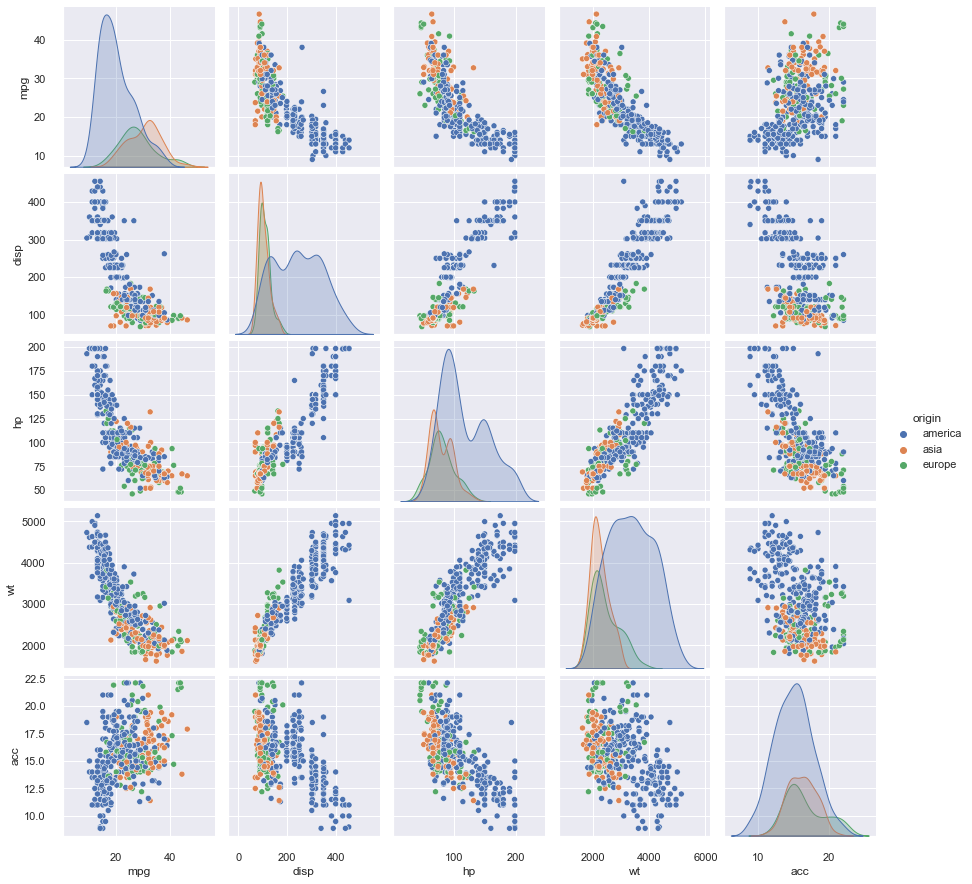

In [3183]:
# Pair Plot
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# setting up plot style 
#style.use('seaborn-poster')
#style.use('fivethirtyeight')
sns.pairplot(df_num,diag_kind='kde',hue='origin')

In [3184]:
df_num.drop('origin', axis= 1, inplace= True)

#### From the above pair plot we see some amount of linearlity between mpg and wt, disp and wt, hp and mpg, hp and wt. We find high linerality between model_yr and age.

### Pair Plot for classification

In [3185]:
#create dummy varibale for mpg_level and origin
df = pd.get_dummies(df, columns=['origin'])
df = pd.get_dummies(df, columns=['mpg_level'])
df.head()

cyl  age   mpg   disp     hp    wt   acc  origin_america  origin_asia  origin_europe  mpg_level_high  mpg_level_low  mpg_level_medium
0    8   51  18.0  307.0  130.0  3504  12.0               1            0              0               0              0                 1
1    8   51  15.0  350.0  165.0  3693  11.5               1            0              0               0              1                 0
2    8   51  18.0  318.0  150.0  3436  11.0               1            0              0               0              0                 1
3    8   51  16.0  304.0  150.0  3433  12.0               1            0              0               0              1                 0
4    8   51  17.0  302.0  140.0  3449  10.5               1            0              0               0              0                 1

In [3186]:
#creating a seperate datset for k-means and heirarchical clustering
dfH=df.copy()
dfK=df.copy()

In [3187]:
dfH

cyl  age   mpg   disp     hp    wt   acc  origin_america  origin_asia  origin_europe  mpg_level_high  mpg_level_low  mpg_level_medium
0      8   51  18.0  307.0  130.0  3504  12.0               1            0              0               0              0                 1
1      8   51  15.0  350.0  165.0  3693  11.5               1            0              0               0              1                 0
2      8   51  18.0  318.0  150.0  3436  11.0               1            0              0               0              0                 1
3      8   51  16.0  304.0  150.0  3433  12.0               1            0              0               0              1                 0
4      8   51  17.0  302.0  140.0  3449  10.5               1            0              0               0              0                 1
..   ...  ...   ...    ...    ...   ...   ...             ...          ...            ...             ...            ...               ...
393    4   39  27.0  140.0   86.0  2790  15.6               1            0              0               0              0                 1
394    4   39  44.0   97.0   52.0  2130  22.1               0            0              1               1              0                 0
395    4   39  32.0  135.0   84.0  2295  11.6               1            0              0               1              0                 0
396    4   39  28.0  120.0   79.0  2625  18.6               1            0              0               0              0                 1
397    4   39  31.0  119.0   82.0  2720  19.4               1            0              0               1              0                 0

[398 rows x 13 columns]

In [3188]:
dfK

cyl  age   mpg   disp     hp    wt   acc  origin_america  origin_asia  origin_europe  mpg_level_high  mpg_level_low  mpg_level_medium
0      8   51  18.0  307.0  130.0  3504  12.0               1            0              0               0              0                 1
1      8   51  15.0  350.0  165.0  3693  11.5               1            0              0               0              1                 0
2      8   51  18.0  318.0  150.0  3436  11.0               1            0              0               0              0                 1
3      8   51  16.0  304.0  150.0  3433  12.0               1            0              0               0              1                 0
4      8   51  17.0  302.0  140.0  3449  10.5               1            0              0               0              0                 1
..   ...  ...   ...    ...    ...   ...   ...             ...          ...            ...             ...            ...               ...
393    4   39  27.0  140.0   86.0  2790  15.6               1            0              0               0              0                 1
394    4   39  44.0   97.0   52.0  2130  22.1               0            0              1               1              0                 0
395    4   39  32.0  135.0   84.0  2295  11.6               1            0              0               1              0                 0
396    4   39  28.0  120.0   79.0  2625  18.6               1            0              0               0              0                 1
397    4   39  31.0  119.0   82.0  2720  19.4               1            0              0               1              0                 0

[398 rows x 13 columns]

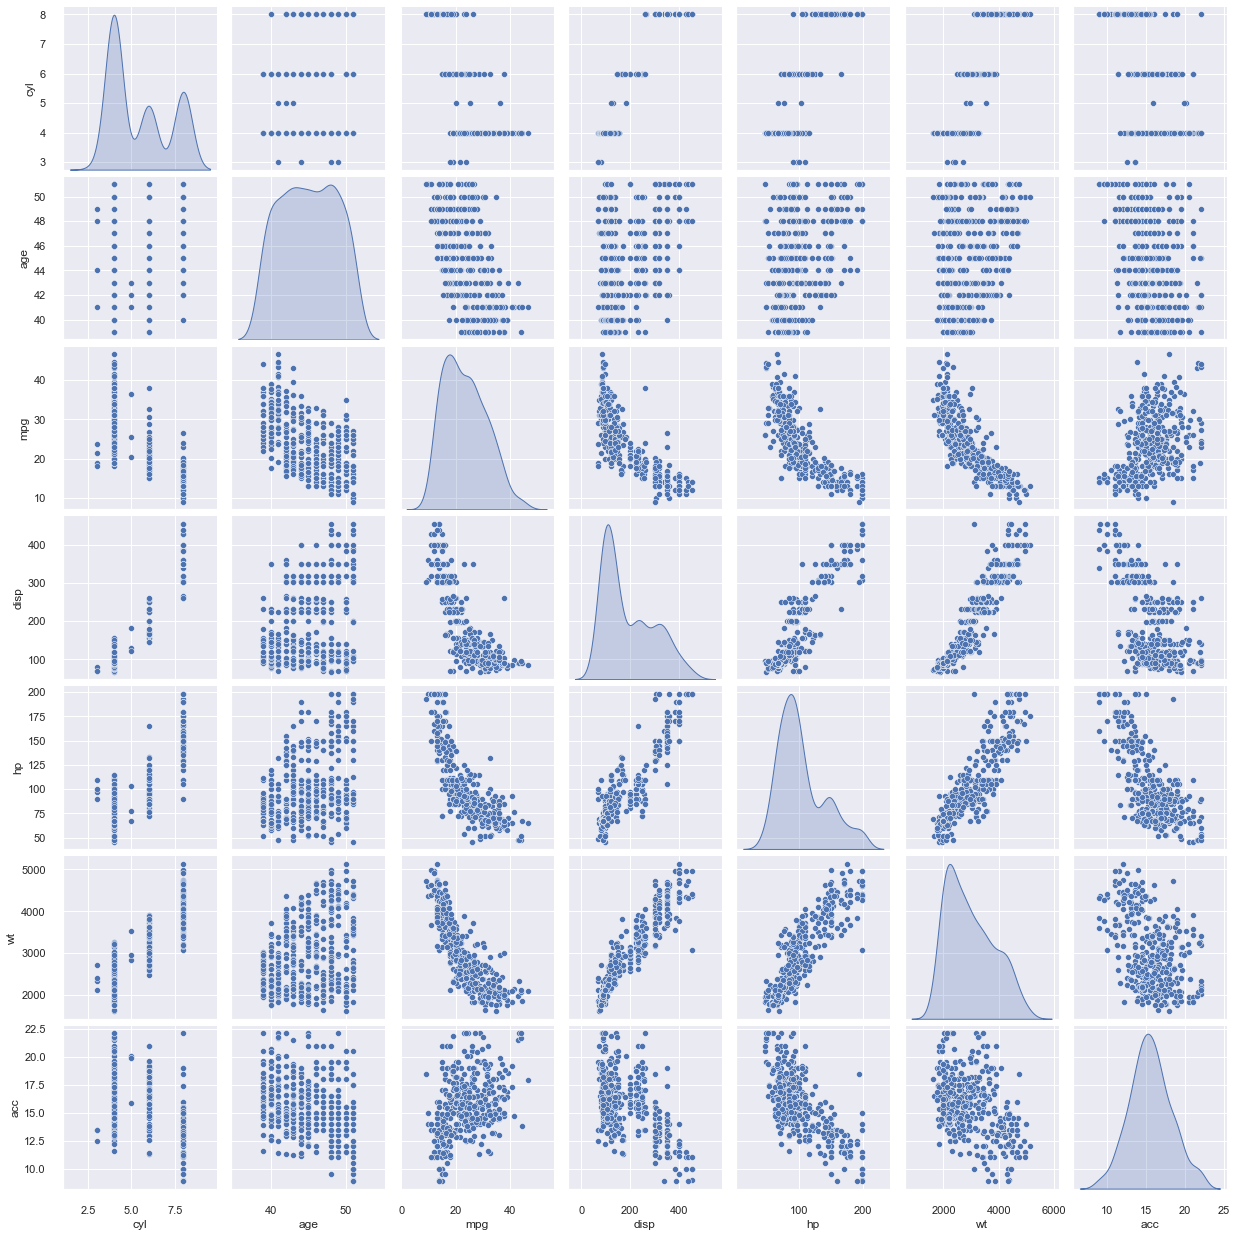

In [3189]:
# Pair Plot
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

df_attr = df.iloc[:, 0:7]
# setting up plot style 
#style.use('seaborn-poster')
#style.use('fivethirtyeight')
sns.pairplot(df_attr,diag_kind='kde')

#### From the above pair plot we see some amount of linearlity between mpg and wt, disp and wt, hp and mpg, hp and wt.

In [3190]:
#dropping the created dummy variable
df2=df.drop(['origin_america','origin_asia','origin_europe','mpg_level_high','mpg_level_low','mpg_level_medium'],axis=1)

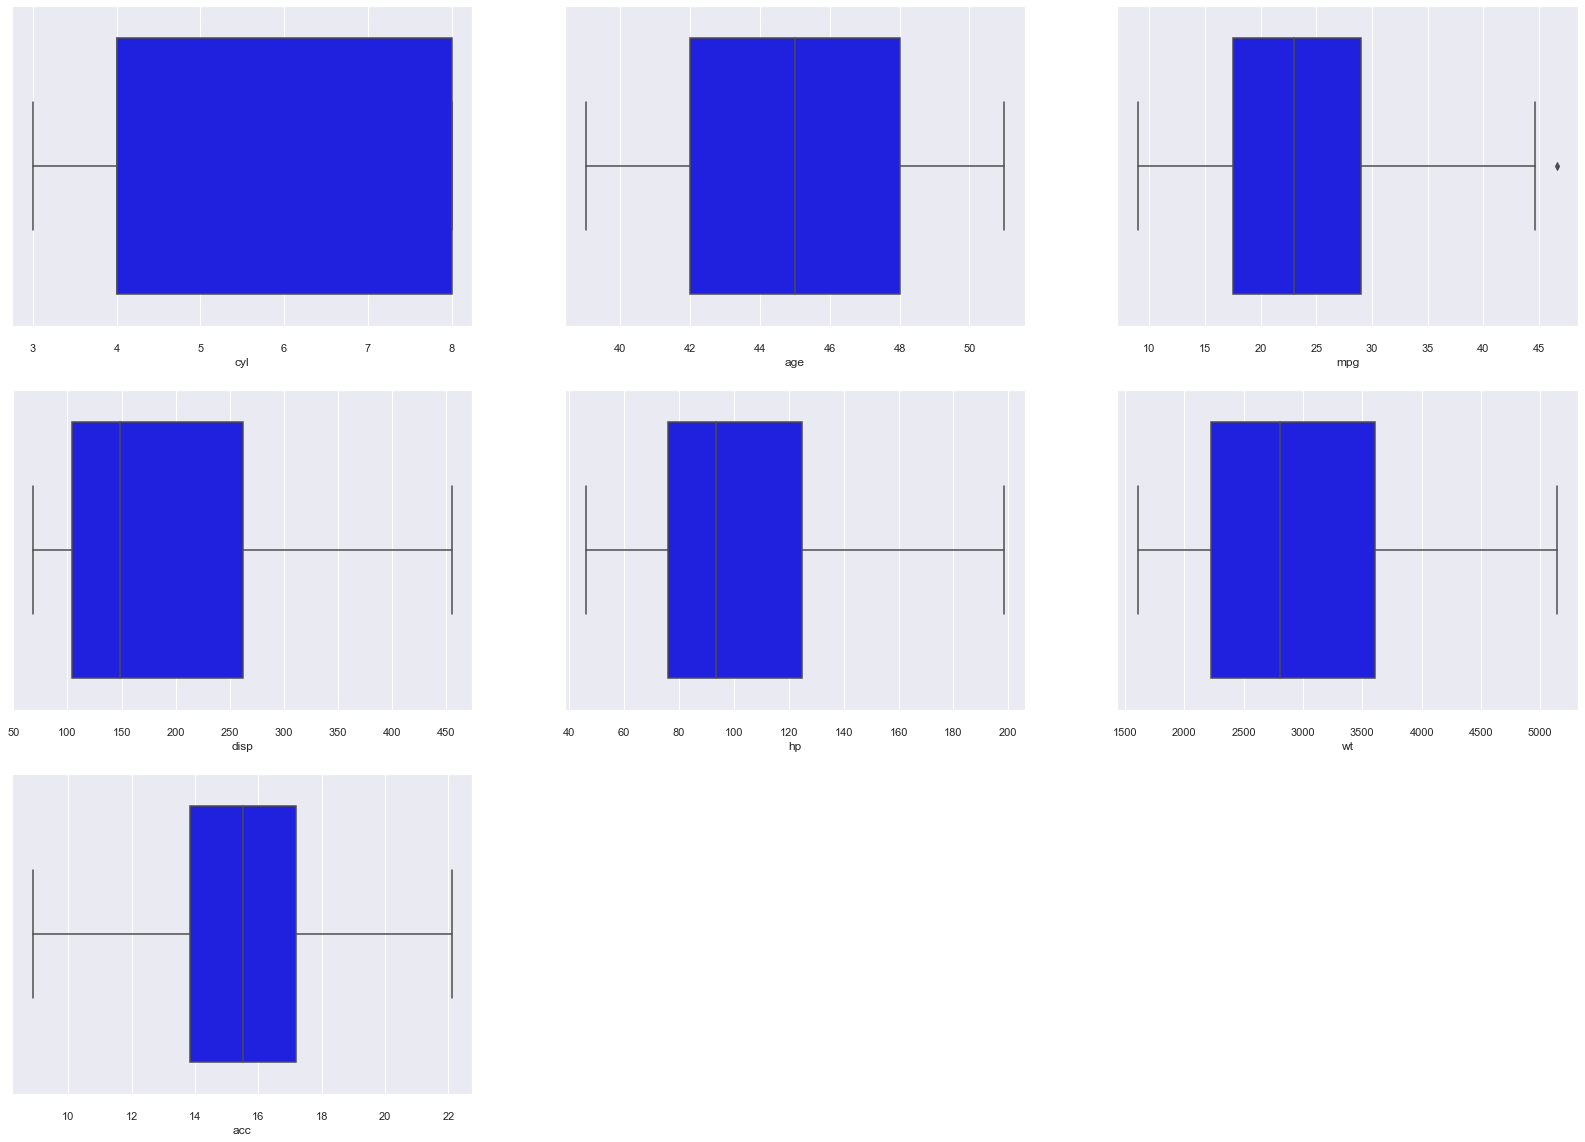

In [3191]:
#checking of outliers
plt.figure(figsize=(25, 20))
col = 1
for i in df2.columns:
    plt.subplot(3, 3, col)
    sns.boxplot(df2[i],color='blue')
    col += 1

#### We find only mpg has 1 outlier which doesnt seem to be our problem.

### Checking correlation

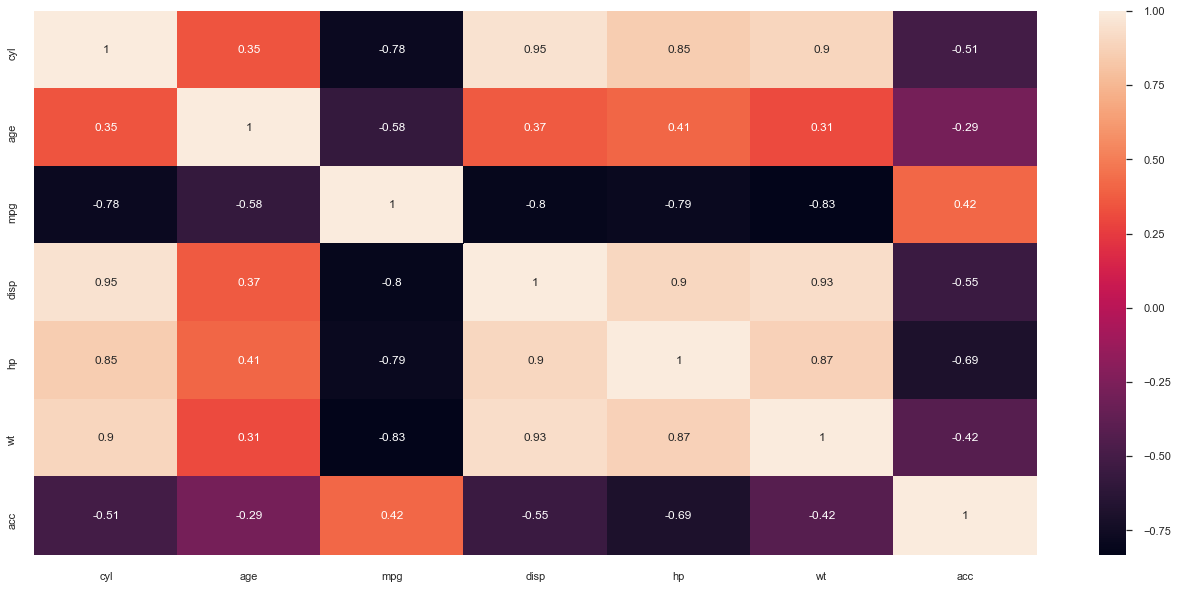

In [3192]:
plt.figure(figsize= (20,10))
sns.heatmap(df2.corr(), annot= True)
plt.show()

#### From the above heat map we see that except Model Year, most of the variable are correlated with each other

### Pandas Profiling

In [3193]:
pandas_profiling.ProfileReport(df2)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3194]:
pandas_profiling.ProfileReport(df2).to_file(output_file='Automobile.html')

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 4. Machine learning:

### Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.

In [3195]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cyl     398 non-null    int64  
 1   age     398 non-null    int64  
 2   mpg     398 non-null    float64
 3   disp    398 non-null    float64
 4   hp      398 non-null    float64
 5   wt      398 non-null    int64  
 6   acc     398 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [3196]:
from scipy.stats import zscore
df2_scaled=df2.apply(zscore)
df2_scaled.head(10)

cyl       age       mpg      disp        hp        wt       acc
0  1.498191  1.627426 -0.706439  1.090604  0.713692  0.630870 -1.322760
1  1.498191  1.627426 -1.090751  1.503514  1.666741  0.854333 -1.509008
2  1.498191  1.627426 -0.706439  1.196232  1.258291  0.550470 -1.695257
3  1.498191  1.627426 -0.962647  1.061796  1.258291  0.546923 -1.322760
4  1.498191  1.627426 -0.834543  1.042591  0.985992  0.565841 -1.881505
5  1.498191  1.627426 -1.090751  2.262118  2.565330  1.620492 -2.067753
6  1.498191  1.627426 -1.218855  2.502182  2.578945  1.635863 -2.440250
7  1.498191  1.627426 -1.218855  2.367746  2.578945  1.586204 -2.486812
8  1.498191  1.627426 -1.218855  2.511784  2.578945  1.719809 -2.067753
9  1.498191  1.627426 -1.090751  1.887617  2.347490  1.039961 -2.486812

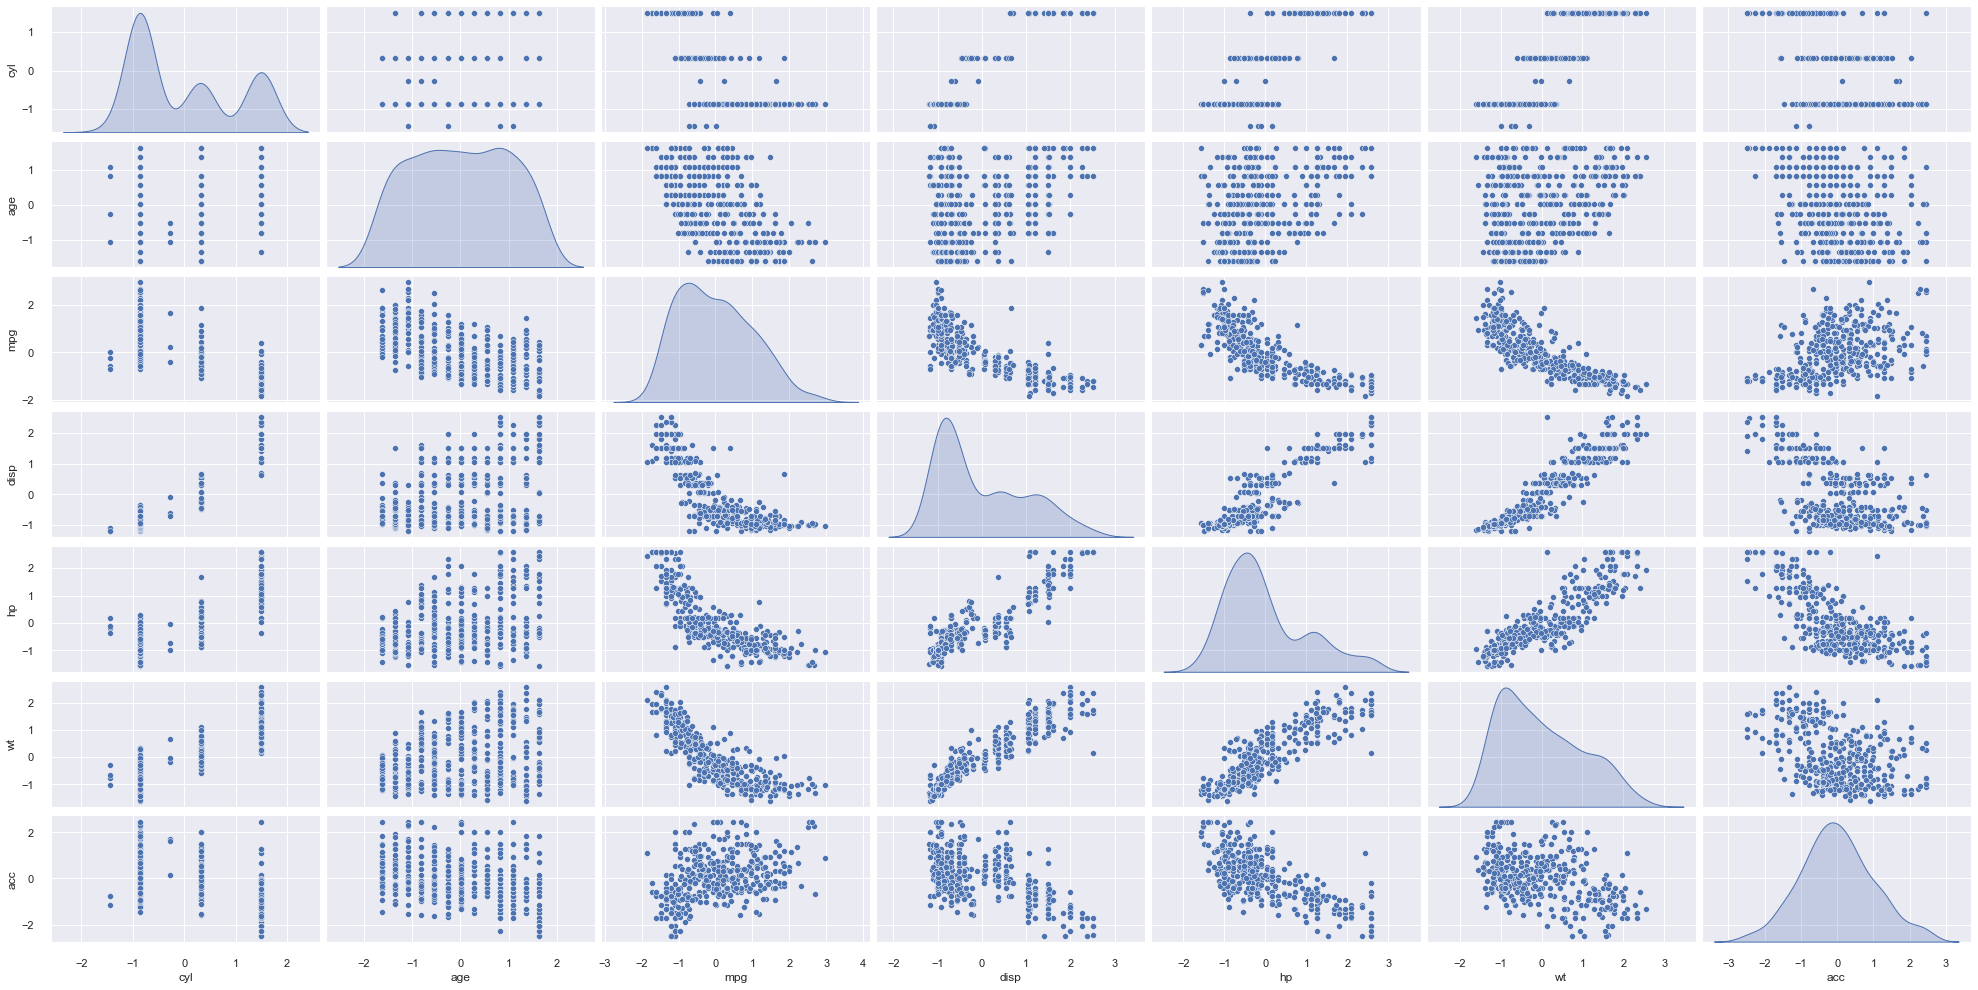

In [3197]:
sns.pairplot(df2_scaled, height=2,aspect=2 , diag_kind='kde')

###  Using Agglomerative Clustering

In [3198]:
from sklearn.cluster import AgglomerativeClustering 

In [3199]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [3200]:
model.fit(df2_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [3201]:
silhouette_score(df2_scaled,model.labels_)

0.34782467343380646

In [3202]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')

In [3203]:
model.fit(df2_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [3204]:
silhouette_score(df2_scaled,model.labels_)

0.2152390337801945

In [3205]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [3206]:
model.fit(df2_scaled)

AgglomerativeClustering(n_clusters=3)

In [3207]:
silhouette_score(df2_scaled,model.labels_)

0.342066035965404

In [3208]:
df2['labels'] = model.labels_
df2.head(10)

#custDataAttr.groupby(["labels"]).count()

cyl  age   mpg   disp     hp    wt     acc  labels
0    8   51  18.0  307.0  130.0  3504  12.000       1
1    8   51  15.0  350.0  165.0  3693  11.500       1
2    8   51  18.0  318.0  150.0  3436  11.000       1
3    8   51  16.0  304.0  150.0  3433  12.000       1
4    8   51  17.0  302.0  140.0  3449  10.500       1
5    8   51  15.0  429.0  198.0  4341  10.000       1
6    8   51  14.0  454.0  198.5  4354   9.000       1
7    8   51  14.0  440.0  198.5  4312   8.875       1
8    8   51  14.0  455.0  198.5  4425  10.000       1
9    8   51  15.0  390.0  190.0  3850   8.875       1

In [3209]:
df2_Clust_Agglo = df2.groupby(['labels'])

In [3210]:
df2_Clust_Agglo.mean()
##df2_Clust_Agglo['Freq']=df2.labels.value_counts().sort_index()

cyl        age        mpg        disp          hp           wt        acc
labels                                                                                
0       4.094595  43.743243  29.001351  113.403153   80.587838  2350.864865  16.420721
1       8.000000  47.303030  14.653535  346.626263  158.287879  4128.393939  12.711364
2       6.103896  45.610390  19.088312  227.168831  100.616883  3267.870130  16.694805

In [3211]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [3212]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [3213]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df2_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df2_scaled))

c

0.7886748007688223

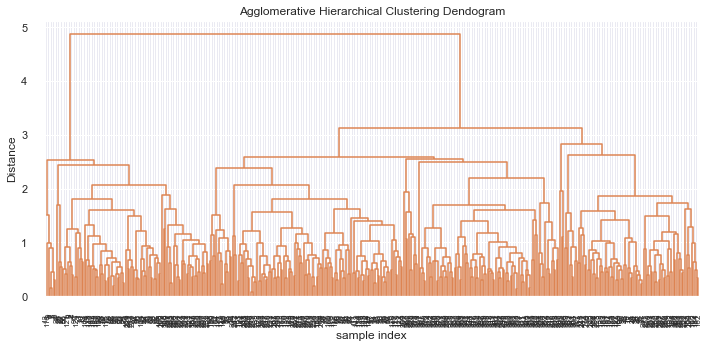

In [3214]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

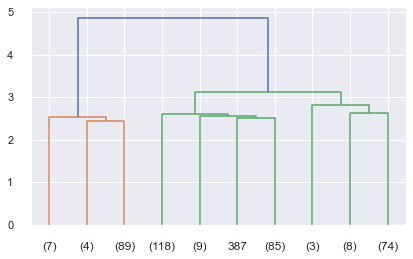

In [3215]:
dend = dendrogram(Z,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [3216]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df2_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df2_scaled))

c

0.7452719890640799

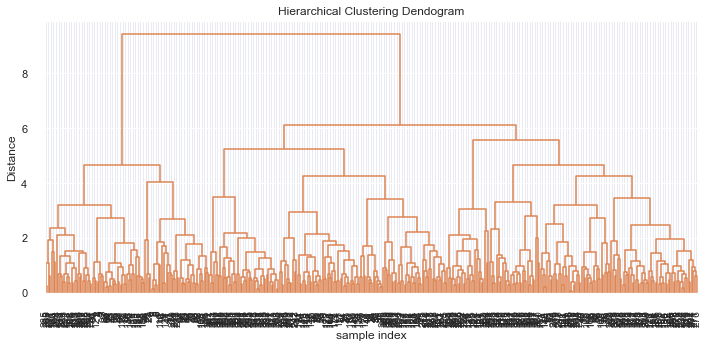

In [3217]:
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

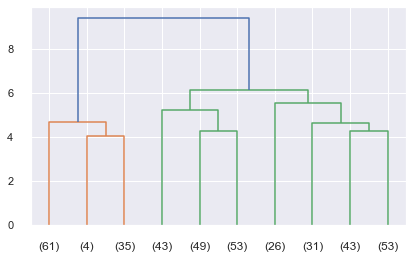

In [3218]:
dend = dendrogram(Z,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [3219]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df2_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df2_scaled))

c

0.7769466936110181

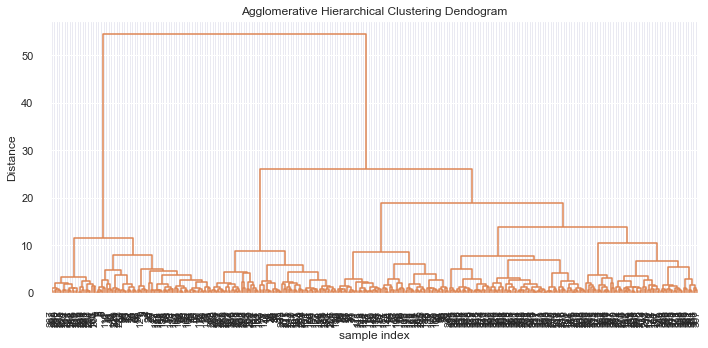

In [3220]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

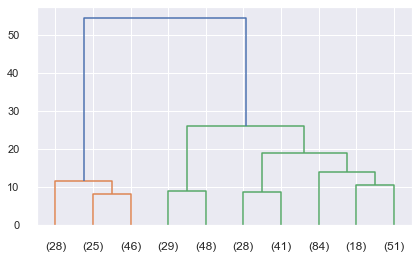

In [3221]:
dend = dendrogram(Z,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [3222]:
#vieweing the clusters formed
clusters = fcluster(Z, 3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 2, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 2, 1, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2,

In [3223]:
#attaching the clusters formed to the scales data
df2_scaled['clusters_H'] = clusters
df2_scaled.head()

cyl       age       mpg      disp        hp        wt       acc  clusters_H
0  1.498191  1.627426 -0.706439  1.090604  0.713692  0.630870 -1.322760           1
1  1.498191  1.627426 -1.090751  1.503514  1.666741  0.854333 -1.509008           1
2  1.498191  1.627426 -0.706439  1.196232  1.258291  0.550470 -1.695257           1
3  1.498191  1.627426 -0.962647  1.061796  1.258291  0.546923 -1.322760           1
4  1.498191  1.627426 -0.834543  1.042591  0.985992  0.565841 -1.881505           1

In [3224]:
#vieweing the distribution of clusters
df2_scaled.clusters_H.value_counts().sort_index()

1     99
2     77
3    222
Name: clusters_H, dtype: int64

In [3225]:
df2.labels.value_counts().sort_index()

0    222
1     99
2     77
Name: labels, dtype: int64

In [3226]:
#attaching the clusters formed to the original data
df2 = df2.drop(['labels'], axis=1)
df2['clusters_H']=clusters
dfH['clusters_H']=clusters
df2.head()

cyl  age   mpg   disp     hp    wt   acc  clusters_H
0    8   51  18.0  307.0  130.0  3504  12.0           1
1    8   51  15.0  350.0  165.0  3693  11.5           1
2    8   51  18.0  318.0  150.0  3436  11.0           1
3    8   51  16.0  304.0  150.0  3433  12.0           1
4    8   51  17.0  302.0  140.0  3449  10.5           1

In [3227]:
#create a new data set named Hclus
Hclus=df2
Hclus.head()

cyl  age   mpg   disp     hp    wt   acc  clusters_H
0    8   51  18.0  307.0  130.0  3504  12.0           1
1    8   51  15.0  350.0  165.0  3693  11.5           1
2    8   51  18.0  318.0  150.0  3436  11.0           1
3    8   51  16.0  304.0  150.0  3433  12.0           1
4    8   51  17.0  302.0  140.0  3449  10.5           1

In [3228]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=df2.iloc[:,0:8].groupby('clusters_H').mean()
aggdata['Freq']=df2.clusters_H.value_counts().sort_index()
aggdata

cyl        age        mpg        disp          hp           wt        acc  Freq
clusters_H                                                                                      
1           8.000000  47.303030  14.653535  346.626263  158.287879  4128.393939  12.711364    99
2           6.103896  45.610390  19.088312  227.168831  100.616883  3267.870130  16.694805    77
3           4.094595  43.743243  29.001351  113.403153   80.587838  2350.864865  16.420721   222

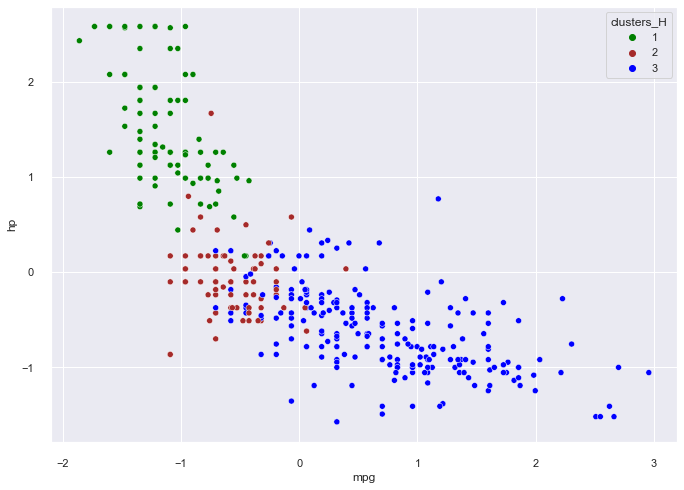

In [3229]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="clusters_H",
              data=df2_scaled, 
                    palette=['green','brown', 'blue']);

In [3230]:
df2 = df2.drop(['clusters_H'], axis=1)
df2_scaled = df2_scaled.drop(['clusters_H'], axis=1)

###  Using K means

In [3231]:
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

In [3232]:
df2_scaled=df2.apply(zscore)
df2_scaled.head(10)

cyl       age       mpg      disp        hp        wt       acc
0  1.498191  1.627426 -0.706439  1.090604  0.713692  0.630870 -1.322760
1  1.498191  1.627426 -1.090751  1.503514  1.666741  0.854333 -1.509008
2  1.498191  1.627426 -0.706439  1.196232  1.258291  0.550470 -1.695257
3  1.498191  1.627426 -0.962647  1.061796  1.258291  0.546923 -1.322760
4  1.498191  1.627426 -0.834543  1.042591  0.985992  0.565841 -1.881505
5  1.498191  1.627426 -1.090751  2.262118  2.565330  1.620492 -2.067753
6  1.498191  1.627426 -1.218855  2.502182  2.578945  1.635863 -2.440250
7  1.498191  1.627426 -1.218855  2.367746  2.578945  1.586204 -2.486812
8  1.498191  1.627426 -1.218855  2.511784  2.578945  1.719809 -2.067753
9  1.498191  1.627426 -1.090751  1.887617  2.347490  1.039961 -2.486812

In [3233]:
#calculatint the within sum of squares
wss =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(df2_scaled)
    wss.append(KM.inertia_)
wss

[2785.999999999999, 1284.4934267938484, 934.1491592677428, 726.7191699272507]

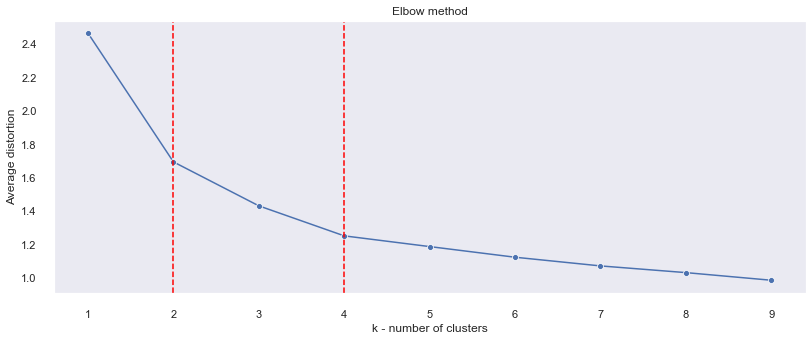

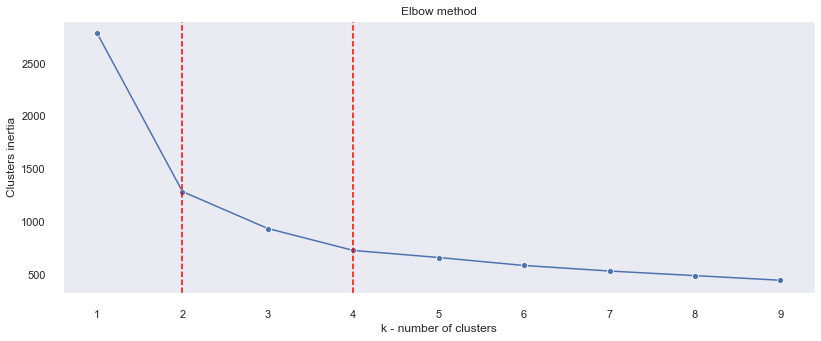

In [3234]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
##s_scores=[] 
clusters_inertia = [] # inertia of clusters

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df2_scaled)
    prediction=model.predict(df2_scaled)
    clusters_inertia.append(model.inertia_)
    ##silhouette_avg=silhouette_score(df_scaled, model.labels_)
    meanDistortions.append(sum(np.min(cdist(df2_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df2_scaled.shape[0])
    ##s_scores.append(silhouette_avg)


#plt.plot(clusters, meanDistortions, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Average distortion')
#plt.title('Selecting k with the Elbow Method')

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(clusters, meanDistortions, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("k - number of clusters")
ax.set_ylabel("Average distortion")
ax.axvline(2, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("k - number of clusters")
ax.set_ylabel("Clusters inertia")
ax.axvline(2, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

### There is clear "elbow" visible on 2 and 4 clusters. Let's see the silhouette score.

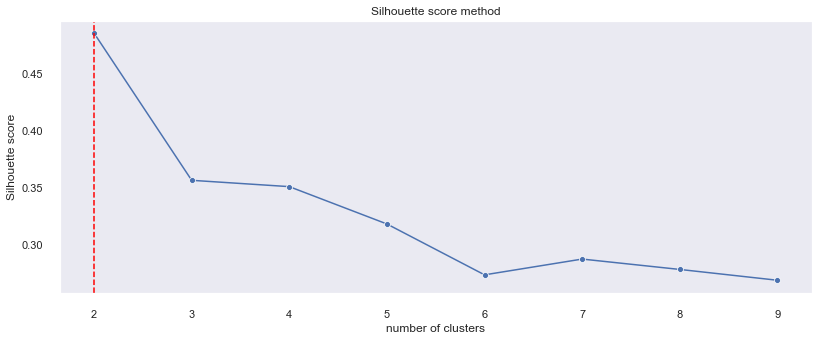

In [3235]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

clusters=range(2,10)

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df2_scaled)
    score = silhouette_score(df2_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)
    
    
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(clusters, silhouette_coefficients, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

### Silhouette score method indicates the best options would be 2 clusters.

In [3236]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(df2_scaled)
prediction=final_model.predict(df2_scaled)

#Append the prediction 
df2["GROUP"] = prediction
df2_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df2.head()

Groups Assigned : 



cyl  age   mpg   disp     hp    wt   acc  GROUP
0    8   51  18.0  307.0  130.0  3504  12.0      1
1    8   51  15.0  350.0  165.0  3693  11.5      1
2    8   51  18.0  318.0  150.0  3436  11.0      1
3    8   51  16.0  304.0  150.0  3433  12.0      1
4    8   51  17.0  302.0  140.0  3449  10.5      1

In [3237]:
silhouette_score(df2_scaled,final_model.labels_)

0.4990700699128552

In [3238]:
df2_Clust_Kmeans = df2.groupby(['GROUP'])
df2_Clust_Kmeans.mean()

cyl        age        mpg        disp          hp           wt        acc
GROUP                                                                                
0      4.569966  44.177474  26.619113  140.250853   85.061433  2567.860068  16.507167
1      7.923810  47.257143  14.851429  341.809524  156.052381  4093.771429  12.883095

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

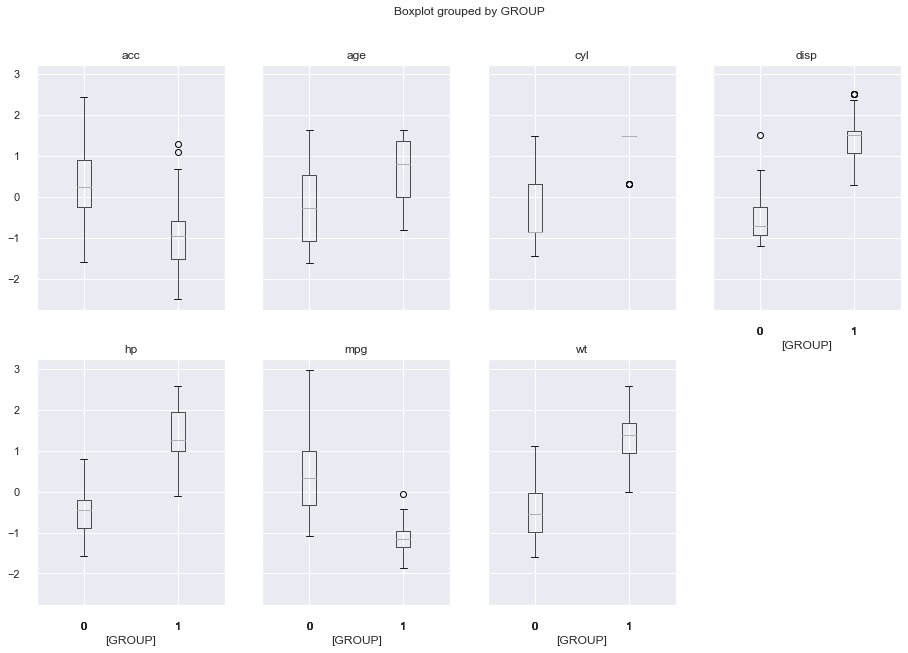

In [3239]:
df2_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [3240]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(df2_scaled)
prediction=final_model.predict(df2_scaled)

#Append the prediction 
df2["GROUP"] = prediction
df2_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df2.head()

Groups Assigned : 



cyl  age   mpg   disp     hp    wt   acc  GROUP
0    8   51  18.0  307.0  130.0  3504  12.0      0
1    8   51  15.0  350.0  165.0  3693  11.5      0
2    8   51  18.0  318.0  150.0  3436  11.0      0
3    8   51  16.0  304.0  150.0  3433  12.0      0
4    8   51  17.0  302.0  140.0  3449  10.5      0

In [3241]:
silhouette_score(df2_scaled,final_model.labels_)

0.3986226188027704

In [3242]:
df2_Clust_Kmeans = df2.groupby(['GROUP'])
df2_Clust_Kmeans.mean()

cyl        age        mpg        disp          hp           wt        acc
GROUP                                                                                
0      7.980000  47.250000  14.715000  346.370000  158.505000  4126.910000  12.737250
1      4.028369  42.014184  31.945390  107.092199   74.312057  2256.021277  16.716312
2      5.127389  46.222930  21.547771  173.544586   95.414013  2875.407643  16.296815

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

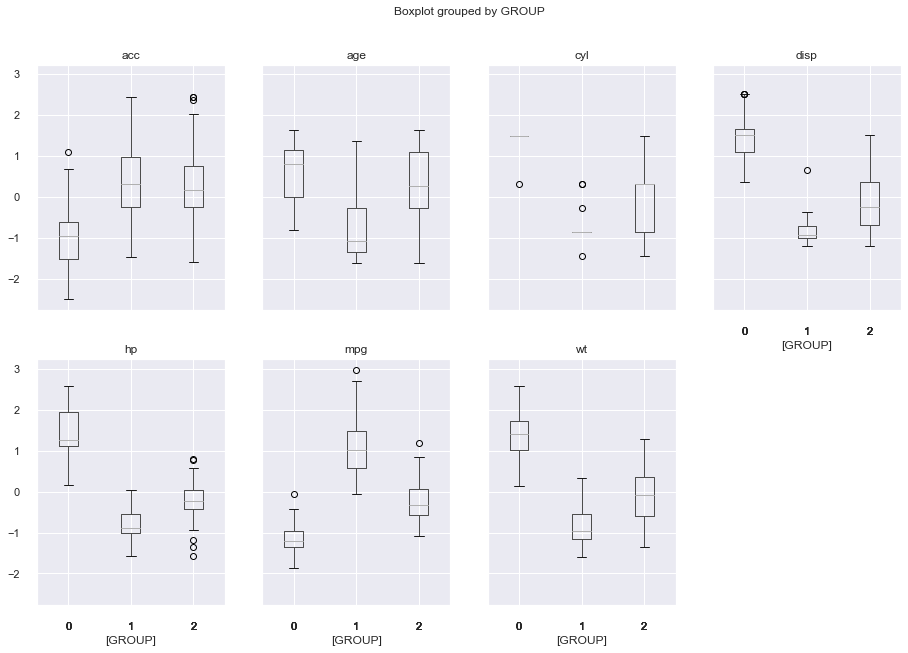

In [3243]:
df2_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [3244]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(df2_scaled)
prediction=final_model.predict(df2_scaled)

#Append the prediction 
df2["GROUP"] = prediction
df2_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df2.head()

Groups Assigned : 



cyl  age   mpg   disp     hp    wt   acc  GROUP
0    8   51  18.0  307.0  130.0  3504  12.0      2
1    8   51  15.0  350.0  165.0  3693  11.5      2
2    8   51  18.0  318.0  150.0  3436  11.0      2
3    8   51  16.0  304.0  150.0  3433  12.0      2
4    8   51  17.0  302.0  140.0  3449  10.5      2

In [3245]:
silhouette_score(df2_scaled,final_model.labels_)

0.48236792254046224

In [3246]:
df2_Clust_Kmeans = df2.groupby(['GROUP'])
df2_Clust_Kmeans.mean()

cyl        age        mpg        disp          hp           wt        acc
GROUP                                                                                
0      6.068966  45.034483  19.833333  219.885057  101.005747  3217.942529  16.410345
1      4.033898  41.101695  32.595763  110.525424   75.135593  2296.491525  16.577119
2      7.980000  47.250000  14.715000  346.370000  158.505000  4126.910000  12.737250
3      3.967742  47.451613  24.897849  109.403226   83.919355  2350.440860  16.470968

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

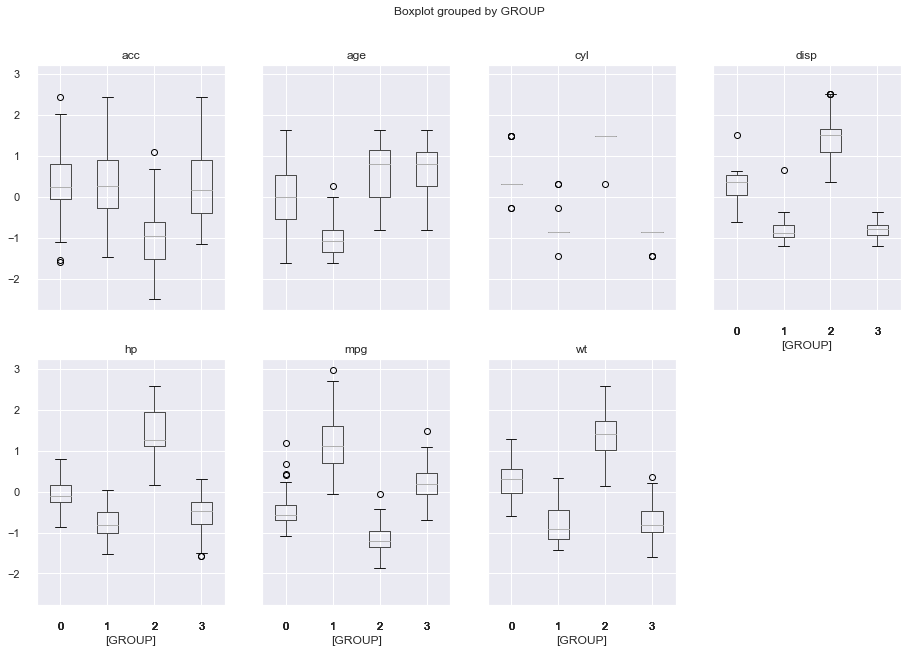

In [3247]:
df2_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

#### We find that Silhouette Score is maximum for 2 Clusters. So that becomes the optimum number of clusters.

In [3248]:
final_model=KMeans(2)
final_model.fit(df2_scaled)
prediction=final_model.predict(df2_scaled)

In [3249]:
df2 = df2.drop(['GROUP'], axis=1)
df2_scaled = df2_scaled.drop(['GROUP'], axis=1)

In [3250]:
#attaching the labels to the datasets

labels=final_model.labels_
df2["cluster_K"] = labels
dfK['cluster_K']=labels
Kclus=df2
Kclus.head()

cyl  age   mpg   disp     hp    wt   acc  cluster_K
0    8   51  18.0  307.0  130.0  3504  12.0          0
1    8   51  15.0  350.0  165.0  3693  11.5          0
2    8   51  18.0  318.0  150.0  3436  11.0          0
3    8   51  16.0  304.0  150.0  3433  12.0          0
4    8   51  17.0  302.0  140.0  3449  10.5          0

In [3251]:
#vieweing the distribution of clusters
df2.cluster_K.value_counts().sort_index()

0    101
1    297
Name: cluster_K, dtype: int64

In [3252]:
#attaching the clsuters to the scaled data
df2_scaled["cluster_K"] = labels
df2_scaled.head()

cyl       age       mpg      disp        hp        wt       acc  cluster_K
0  1.498191  1.627426 -0.706439  1.090604  0.713692  0.630870 -1.322760          0
1  1.498191  1.627426 -1.090751  1.503514  1.666741  0.854333 -1.509008          0
2  1.498191  1.627426 -0.706439  1.196232  1.258291  0.550470 -1.695257          0
3  1.498191  1.627426 -0.962647  1.061796  1.258291  0.546923 -1.322760          0
4  1.498191  1.627426 -0.834543  1.042591  0.985992  0.565841 -1.881505          0

In [3253]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=df2.iloc[:,0:8].groupby('cluster_K').mean()
aggdata['Freq']=df2.cluster_K.value_counts().sort_index()
aggdata

cyl        age        mpg        disp          hp           wt        acc  Freq
cluster_K                                                                                      
0          7.980198  47.217822  14.737624  345.514851  158.024752  4126.247525  12.799257   101
1          4.595960  44.232323  26.499327  141.705387   85.346801  2577.367003  16.486869   297

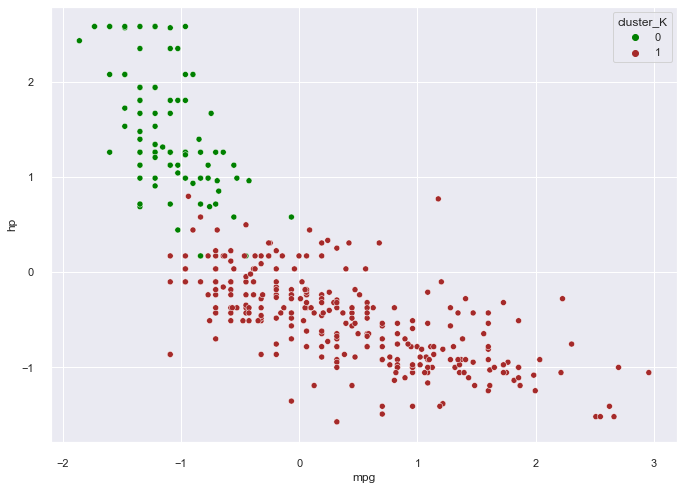

In [3254]:
#plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="cluster_K",
              data=df2_scaled, 
                    palette=['green','brown']);

In [3255]:
dfH.clusters_H.value_counts().sort_index()

1     99
2     77
3    222
Name: clusters_H, dtype: int64

In [3256]:
dfK.cluster_K.value_counts().sort_index()

0    101
1    297
Name: cluster_K, dtype: int64

In [3257]:
dfH.shape

(398, 14)

In [3258]:
dfK.shape

(398, 14)

In [3259]:
df.head()

cyl  age   mpg   disp     hp    wt   acc  origin_america  origin_asia  origin_europe  mpg_level_high  mpg_level_low  mpg_level_medium
0    8   51  18.0  307.0  130.0  3504  12.0               1            0              0               0              0                 1
1    8   51  15.0  350.0  165.0  3693  11.5               1            0              0               0              1                 0
2    8   51  18.0  318.0  150.0  3436  11.0               1            0              0               0              0                 1
3    8   51  16.0  304.0  150.0  3433  12.0               1            0              0               0              1                 0
4    8   51  17.0  302.0  140.0  3449  10.5               1            0              0               0              0                 1

### Share your insights about the difference in using these two methods.

### In Hierarchical Clustering  

In [3260]:
#aggregating the numerical variable with the clusters formed with the mean for Heirarchical Clustering
Hclusaggdata=Hclus.iloc[:,0:8].groupby('clusters_H').mean()
Hclusaggdata['Freq']=Hclus.clusters_H.value_counts().sort_index()
Hclusaggdata

cyl        age        mpg        disp          hp           wt        acc  Freq
clusters_H                                                                                      
1           8.000000  47.303030  14.653535  346.626263  158.287879  4128.393939  12.711364    99
2           6.103896  45.610390  19.088312  227.168831  100.616883  3267.870130  16.694805    77
3           4.094595  43.743243  29.001351  113.403153   80.587838  2350.864865  16.420721   222

#### From the above mean we see find that most of the cars have less horsepower using 4 cylinders although it gives good miles per gallon.

In [3261]:
clusters_H=Hclus['clusters_H']
clusters_H

0      1
1      1
2      1
3      1
4      1
      ..
393    3
394    3
395    3
396    3
397    3
Name: clusters_H, Length: 398, dtype: int32

In [3262]:
Hclus = Hclus.drop(['clusters_H'], axis=1)
Hclus

cyl  age   mpg   disp     hp    wt   acc
0      8   51  18.0  307.0  130.0  3504  12.0
1      8   51  15.0  350.0  165.0  3693  11.5
2      8   51  18.0  318.0  150.0  3436  11.0
3      8   51  16.0  304.0  150.0  3433  12.0
4      8   51  17.0  302.0  140.0  3449  10.5
..   ...  ...   ...    ...    ...   ...   ...
393    4   39  27.0  140.0   86.0  2790  15.6
394    4   39  44.0   97.0   52.0  2130  22.1
395    4   39  32.0  135.0   84.0  2295  11.6
396    4   39  28.0  120.0   79.0  2625  18.6
397    4   39  31.0  119.0   82.0  2720  19.4

[398 rows x 7 columns]

In [3263]:
Hclus_scaled=Hclus.apply(zscore)
Hclus_scaled=pd.concat([Hclus_scaled,clusters_H],axis=1)
Hclus_scaled

cyl       age       mpg      disp        hp        wt       acc  clusters_H
0    1.498191  1.627426 -0.706439  1.090604  0.713692  0.630870 -1.322760           1
1    1.498191  1.627426 -1.090751  1.503514  1.666741  0.854333 -1.509008           1
2    1.498191  1.627426 -0.706439  1.196232  1.258291  0.550470 -1.695257           1
3    1.498191  1.627426 -0.962647  1.061796  1.258291  0.546923 -1.322760           1
4    1.498191  1.627426 -0.834543  1.042591  0.985992  0.565841 -1.881505           1
..        ...       ...       ...       ...       ...       ...       ...         ...
393 -0.856321 -1.621983  0.446497 -0.513026 -0.484427 -0.213324  0.018227           3
394 -0.856321 -1.621983  2.624265 -0.925936 -1.410245 -0.993671  2.439454           3
395 -0.856321 -1.621983  1.087017 -0.561039 -0.538887 -0.798585 -1.471759           3
396 -0.856321 -1.621983  0.574601 -0.705077 -0.675036 -0.408411  1.135716           3
397 -0.856321 -1.621983  0.958913 -0.714680 -0.593346 -0.296088  1.433714           3

[398 rows x 8 columns]

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[clusters_H]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[clusters_H]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[clusters_H]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[clusters_H]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[clusters_H]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[clusters_H]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[clusters_H]'>,
        <AxesSubplot:>]], dtype=object)

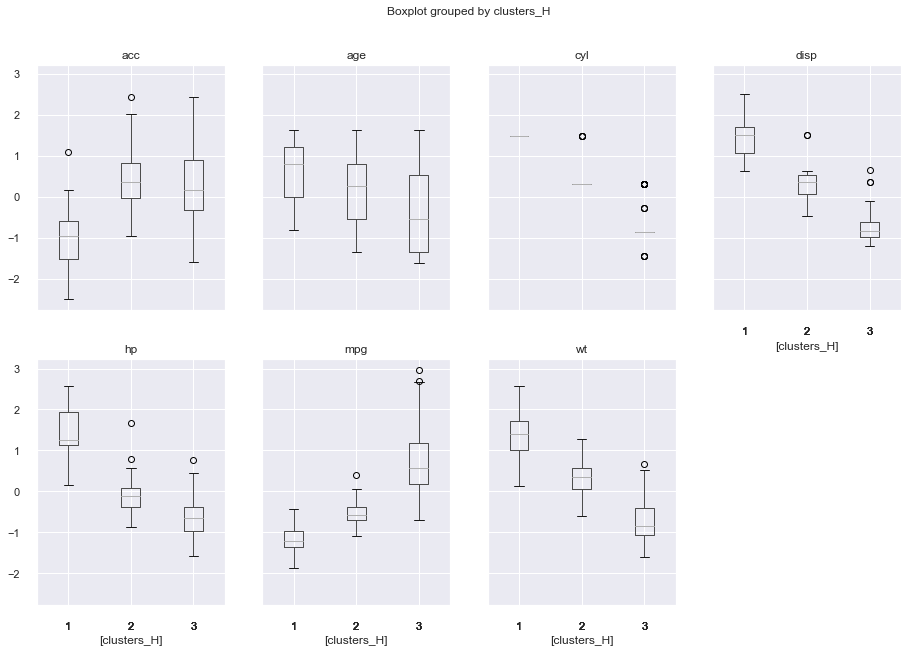

In [3264]:
Hclus_scaled.boxplot(by='clusters_H', layout = (2,4),figsize=(15,10))

In [3265]:
Hclus=pd.concat([Hclus,clusters_H],axis=1)
Hclus

cyl  age   mpg   disp     hp    wt   acc  clusters_H
0      8   51  18.0  307.0  130.0  3504  12.0           1
1      8   51  15.0  350.0  165.0  3693  11.5           1
2      8   51  18.0  318.0  150.0  3436  11.0           1
3      8   51  16.0  304.0  150.0  3433  12.0           1
4      8   51  17.0  302.0  140.0  3449  10.5           1
..   ...  ...   ...    ...    ...   ...   ...         ...
393    4   39  27.0  140.0   86.0  2790  15.6           3
394    4   39  44.0   97.0   52.0  2130  22.1           3
395    4   39  32.0  135.0   84.0  2295  11.6           3
396    4   39  28.0  120.0   79.0  2625  18.6           3
397    4   39  31.0  119.0   82.0  2720  19.4           3

[398 rows x 8 columns]

### In K Means

In [3266]:
Kclusaggdata=Kclus.iloc[:,0:8].groupby('cluster_K').mean()
Kclusaggdata['Freq']=Kclus.cluster_K.value_counts().sort_index()
Kclusaggdata

cyl        age        mpg        disp          hp           wt        acc  Freq
cluster_K                                                                                      
0          7.980198  47.217822  14.737624  345.514851  158.024752  4126.247525  12.799257   101
1          4.595960  44.232323  26.499327  141.705387   85.346801  2577.367003  16.486869   297

#### From the above mean we see find that most of the cars have less horsepower using 4 cylinders although it gives good miles per gallon.

In [3267]:
cluster_K=Kclus['cluster_K']
cluster_K

0      0
1      0
2      0
3      0
4      0
      ..
393    1
394    1
395    1
396    1
397    1
Name: cluster_K, Length: 398, dtype: int32

In [3268]:
Kclus = Kclus.drop(['cluster_K'], axis=1)
Kclus

cyl  age   mpg   disp     hp    wt   acc
0      8   51  18.0  307.0  130.0  3504  12.0
1      8   51  15.0  350.0  165.0  3693  11.5
2      8   51  18.0  318.0  150.0  3436  11.0
3      8   51  16.0  304.0  150.0  3433  12.0
4      8   51  17.0  302.0  140.0  3449  10.5
..   ...  ...   ...    ...    ...   ...   ...
393    4   39  27.0  140.0   86.0  2790  15.6
394    4   39  44.0   97.0   52.0  2130  22.1
395    4   39  32.0  135.0   84.0  2295  11.6
396    4   39  28.0  120.0   79.0  2625  18.6
397    4   39  31.0  119.0   82.0  2720  19.4

[398 rows x 7 columns]

In [3269]:
Kclus_scaled=Kclus.apply(zscore)
Kclus_scaled=pd.concat([Kclus_scaled,cluster_K],axis=1)
Kclus_scaled

cyl       age       mpg      disp        hp        wt       acc  cluster_K
0    1.498191  1.627426 -0.706439  1.090604  0.713692  0.630870 -1.322760          0
1    1.498191  1.627426 -1.090751  1.503514  1.666741  0.854333 -1.509008          0
2    1.498191  1.627426 -0.706439  1.196232  1.258291  0.550470 -1.695257          0
3    1.498191  1.627426 -0.962647  1.061796  1.258291  0.546923 -1.322760          0
4    1.498191  1.627426 -0.834543  1.042591  0.985992  0.565841 -1.881505          0
..        ...       ...       ...       ...       ...       ...       ...        ...
393 -0.856321 -1.621983  0.446497 -0.513026 -0.484427 -0.213324  0.018227          1
394 -0.856321 -1.621983  2.624265 -0.925936 -1.410245 -0.993671  2.439454          1
395 -0.856321 -1.621983  1.087017 -0.561039 -0.538887 -0.798585 -1.471759          1
396 -0.856321 -1.621983  0.574601 -0.705077 -0.675036 -0.408411  1.135716          1
397 -0.856321 -1.621983  0.958913 -0.714680 -0.593346 -0.296088  1.433714          1

[398 rows x 8 columns]

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[cluster_K]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[cluster_K]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[cluster_K]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[cluster_K]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[cluster_K]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[cluster_K]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[cluster_K]'>,
        <AxesSubplot:>]], dtype=object)

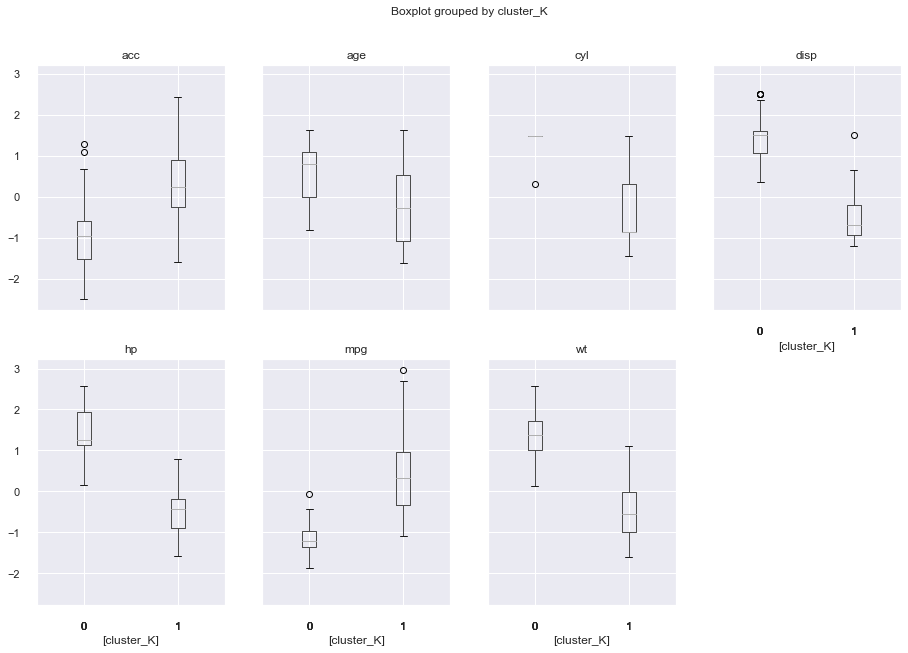

In [3270]:
Kclus_scaled.boxplot(by='cluster_K', layout = (2,4),figsize=(15,10))

In [3271]:
Kclus=pd.concat([Kclus,cluster_K],axis=1)
Kclus

cyl  age   mpg   disp     hp    wt   acc  cluster_K
0      8   51  18.0  307.0  130.0  3504  12.0          0
1      8   51  15.0  350.0  165.0  3693  11.5          0
2      8   51  18.0  318.0  150.0  3436  11.0          0
3      8   51  16.0  304.0  150.0  3433  12.0          0
4      8   51  17.0  302.0  140.0  3449  10.5          0
..   ...  ...   ...    ...    ...   ...   ...        ...
393    4   39  27.0  140.0   86.0  2790  15.6          1
394    4   39  44.0   97.0   52.0  2130  22.1          1
395    4   39  32.0  135.0   84.0  2295  11.6          1
396    4   39  28.0  120.0   79.0  2625  18.6          1
397    4   39  31.0  119.0   82.0  2720  19.4          1

[398 rows x 8 columns]

### Differences -

#### * We find that one heavy cluster formed by K Means is almost equal to combination of the lightweight and heavy weight clusters formed in Heirarchical clustering.
#### * Also comparing the silhouette scores from different linkages of Heirarchical clustering are much lower than the the scores obtained from different K Means cluster values.
#### * We find that the optimum clusters is coming from K Means as 2 which has the highest silhoutte score comparing to all scores from Heirarchical and K Means.
#### * By the box plots we find more outliers from Heirarchical Clustering than K Means, so K Means is definately a better option for clusterin.


## 5. Answer below questions based on outcomes of using ML based methods.

### Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

#### There are 2 optimal clusters present in the data as we can see from the high silhouette score. The Silhouette Score for 2 clusters - 0.5 from K Means is highest comparing to all the silhouette scores from Hierarchical clustering and K Means.

### Use linear regression model on different clusters separately and print the coefficients of the models individually

In [3272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cyl               398 non-null    int64  
 1   age               398 non-null    int64  
 2   mpg               398 non-null    float64
 3   disp              398 non-null    float64
 4   hp                398 non-null    float64
 5   wt                398 non-null    int64  
 6   acc               398 non-null    float64
 7   origin_america    398 non-null    uint8  
 8   origin_asia       398 non-null    uint8  
 9   origin_europe     398 non-null    uint8  
 10  mpg_level_high    398 non-null    uint8  
 11  mpg_level_low     398 non-null    uint8  
 12  mpg_level_medium  398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(6)
memory usage: 24.2 KB


In [3273]:
from sklearn.model_selection import train_test_split
# Transform data into features and target
X = df.drop(['mpg','origin_europe','mpg_level_low'], axis=1)
# the dependent variable
y = df[['mpg']]

In [3274]:
X

cyl  age   disp     hp    wt   acc  origin_america  origin_asia  mpg_level_high  mpg_level_medium
0      8   51  307.0  130.0  3504  12.0               1            0               0                 1
1      8   51  350.0  165.0  3693  11.5               1            0               0                 0
2      8   51  318.0  150.0  3436  11.0               1            0               0                 1
3      8   51  304.0  150.0  3433  12.0               1            0               0                 0
4      8   51  302.0  140.0  3449  10.5               1            0               0                 1
..   ...  ...    ...    ...   ...   ...             ...          ...             ...               ...
393    4   39  140.0   86.0  2790  15.6               1            0               0                 1
394    4   39   97.0   52.0  2130  22.1               0            0               1                 0
395    4   39  135.0   84.0  2295  11.6               1            0               1                 0
396    4   39  120.0   79.0  2625  18.6               1            0               0                 1
397    4   39  119.0   82.0  2720  19.4               1            0               1                 0

[398 rows x 10 columns]

In [3275]:
y

mpg
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
..    ...
393  27.0
394  44.0
395  32.0
396  28.0
397  31.0

[398 rows x 1 columns]

In [3276]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [3277]:
print('X_train ', X_train.shape)
print('X_test ', X_test.shape)
print('y_train ', y_train.shape)
print('y_test ', y_test.shape)

X_train  (278, 10)
X_test  (120, 10)
y_train  (278, 1)
y_test  (120, 1)


In [3278]:
X_train

cyl  age   disp     hp    wt   acc  origin_america  origin_asia  mpg_level_high  mpg_level_medium
190    8   45  351.0  152.0  4215  12.8               1            0               0                 0
79     4   49   96.0   69.0  2189  18.0               0            0               0                 1
55     4   50   97.0   60.0  1834  19.0               0            0               0                 1
383    4   39   91.0   67.0  1965  15.0               0            1               1                 0
326    4   41   90.0   48.0  2335  22.1               0            0               1                 0
..   ...  ...    ...    ...   ...   ...             ...          ...             ...               ...
384    4   39   91.0   67.0  1965  15.7               0            1               1                 0
375    4   39  105.0   74.0  1980  15.3               0            0               1                 0
133    6   47  250.0  100.0  3781  17.0               1            0               0                 0
396    4   39  120.0   79.0  2625  18.6               1            0               0                 1
245    4   43   98.0   66.0  1800  14.4               1            0               1                 0

[278 rows x 10 columns]

In [3279]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [3280]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.52957068180804
The coefficient for age is -0.4417255293725994
The coefficient for disp is 0.010970842346308135
The coefficient for hp is 0.006886621555026212
The coefficient for wt is -0.004430004555600912
The coefficient for acc is 0.17042955648279925
The coefficient for origin_america is -1.768489873074465
The coefficient for origin_asia is -0.9112671209085144
The coefficient for mpg_level_high is 8.539701047051206
The coefficient for mpg_level_medium is 1.5877306124756418


In [3281]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 52.356502334112776


In [3282]:
regression_model.score(X_train, y_train)

0.8963749834065193

In [3283]:
O=regression_model.score(X_test, y_test)
O

0.9036761248829795

### How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

#### Linear regression on data with K means cluster

In [3284]:
#renaming the cluster labels to light and heavy vehicles and creating dummy variables of it
dfK['cluster_K']=dfK['cluster_K'].astype('category')
dfK['cluster_K'] = dfK['cluster_K'].replace({1: 'heavy', 0: 'light'})
dfK = pd.get_dummies(dfK, columns=['cluster_K'])

In [3285]:
dfK.head()

cyl  age   mpg   disp     hp    wt   acc  origin_america  origin_asia  origin_europe  mpg_level_high  mpg_level_low  mpg_level_medium  cluster_K_heavy  cluster_K_light
0    8   51  18.0  307.0  130.0  3504  12.0               1            0              0               0              0                 1                0                1
1    8   51  15.0  350.0  165.0  3693  11.5               1            0              0               0              1                 0                0                1
2    8   51  18.0  318.0  150.0  3436  11.0               1            0              0               0              0                 1                0                1
3    8   51  16.0  304.0  150.0  3433  12.0               1            0              0               0              1                 0                0                1
4    8   51  17.0  302.0  140.0  3449  10.5               1            0              0               0              0                 1                0                1

In [3286]:
X = dfK.drop(['mpg','origin_europe','mpg_level_low','cluster_K_light'], axis=1)
# the dependent variable
y = dfK[['mpg']]

In [3287]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [3288]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [3289]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -1.2029121880919893
The coefficient for age is -0.423841518846439
The coefficient for disp is 0.01676601923483455
The coefficient for hp is -0.02121596522335679
The coefficient for wt is -0.003816516857235393
The coefficient for acc is 0.1373711663246954
The coefficient for origin_america is -1.6402694707500867
The coefficient for origin_asia is -0.7055267217987213
The coefficient for mpg_level_high is 9.240505942464228
The coefficient for mpg_level_medium is 2.290879915150732
The coefficient for cluster_K_heavy is -2.9500437009917833


In [3290]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 57.25447432073328


In [3291]:
regression_model.score(X_train, y_train)

0.8947184435394759

In [3292]:
K=regression_model.score(X_test, y_test)
K

0.9124625709706353

#### Linear regression on data with H-clusters

In [3293]:
#renaming the cluster labels to light and heavy vehicles and creating summy variable of it
dfH['clusters_H']=dfH['clusters_H'].astype('category')
dfH['clusters_H'] = dfH['clusters_H'].replace({3: 'heavy', 1: 'medium', 2: 'light'})
dfH = pd.get_dummies(dfH, columns=['clusters_H'])

In [3294]:
X = dfH.drop(['mpg','origin_europe','mpg_level_low','clusters_H_light', 'clusters_H_medium'], axis=1)
# the dependent variable
y = dfH[['mpg']]

In [3295]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [3296]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [3297]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.6653399347549809
The coefficient for age is -0.3601374894107213
The coefficient for disp is 0.016478461672933233
The coefficient for hp is -0.036239200912783064
The coefficient for wt is -0.0033821009635480338
The coefficient for acc is 0.06758877610518975
The coefficient for origin_america is -1.7092750288280696
The coefficient for origin_asia is -1.180217728344752
The coefficient for mpg_level_high is 8.485204627713786
The coefficient for mpg_level_medium is 1.7337134870789301
The coefficient for clusters_H_heavy is 5.491486595589887


In [3298]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 41.02167118641085


In [3299]:
regression_model.score(X_train, y_train)

0.9129645327478465

In [3300]:
H=regression_model.score(X_test, y_test)
H

0.8959336948137427

In [3302]:
modellists = []
modellists.append(['Linear Regression on Original Data set', O*100])
modellists.append(['Linear Regression with K means clusters', K*100])
modellists.append(['Linear Regression with Heirarchical clusters', H*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','r^2 on Test'])
mdl_df

Model  r^2 on Test
0        Linear Regression on Original Data set    90.367612
1       Linear Regression with K means clusters    91.246257
2  Linear Regression with Heirarchical clusters    89.593369

### K-means appears to explain the highest variation in the datset, but with a difference of only 1% when compared with other models, to get more clarity a larger dataset may be used, since this is a dataset of used cars it doesn't give us how many previous owners has the cars seen which might be helpful variable,the gender of the previous owners, the reason/purpose that the cars were being used is also an important factor which the dataset doen't capture. 
### With the above mentioned features it may be possible to get a higher accuracy or explainability of the models and its variables.

## 6. Improvisation:

### Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to perform a better data analysis in future.

#### * Very few cars use cylinders 3 and 5. Most dominant use of cylinders by cars is 4. Even seeing the mean by Heirarchical and K means clutering we see value of mean for cyl is around 4 for heavy weight cluters. So my recommendation would be to divide the number of cars which use cylinders 4 to 3 and 5.
#### * We also see that maximum cars around 249 are from America which constitutes around 62.5% of the total number of cars. And less than 38% cars are from Asian and European origin. So my suggestion would be to divide cars amongst Asian and European countries.
#### * Around 209 cars have medium Miles Per Gallon which constitutes around 52.5% of total cars. Rest of them have high and low MPG. My suggestion would be improve the engine performance of cars which give low MPG.
#### * From the scatter plots of clustering we see negative linearity between mpg and hp. hp decreases with increase of mpg and by seeing the heavy clusters we see that most of the cars have higher mpg but less hp. My suggestion would be to increase the number of cars with more horsepower. We see maximum number of cars with both Heirarchical and K Means clustering having less horsepower. This needs to be improved.